In [99]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os

In [100]:
def read_file(file_name):
    array = np.loadtxt(file_name)
    data = list(zip(*array))
    return data

def plot_multiple(data, data_name, data_xlabel, data_ylabel, legend_names): # plot several results together
    fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize=(10,7))
    m = []
    axes.set_title(data_name)
    axes.set_xlabel(data_xlabel)
    axes.set_ylabel(data_ylabel)
    for j in range(len(data)):
        m1 = axes.errorbar(data[j][0], data[j][1], yerr = data[j][2])
        m.append(m1)
    axes.legend(m, legend_names)
    plt.show()
    plt.clf()
    
def get_potential(data_path, T1):
    T = T1 - 1
    x = []
    y = []
    y_err = []
    for i in range(1, 17):
        data= read_file(data_path + '%d' % (i))
        y.append(math.log(data[1][T]/data[1][T+1]))
        y_err.append(math.sqrt( (data[2][T]/data[1][T])*(data[2][T]/data[1][T]) + (data[2][T+1]/data[1][T+1])*(data[2][T+1]/data[1][T+1])) )
        x.append(i)
    return x, y, y_err

def merge(data1, data2):
    data = []
    x = []
    y = []
    y_err = []
    for i in range(len(data1[1])):
        x.append(data1[0][i])
        y.append(data1[1][i] + data2[1][i])
        y_err.append(data1[2][i] + data2[2][i])
    return x, y, y_err
    
def potential_plot_multiple(T, mu):
    data = []
    w=mu//10
    q=mu-w*10
    data.append(get_potential('/home/ilya/lattice/observables/data/wilson_loop/mon_wl/mu0.%d%d/potential_R=' % (w, q), T))
    data.append(get_potential('/home/ilya/lattice/observables/data/wilson_loop/offd/HYP_APE/mu0.%d%d/potential_R=' % (w, q), T))
    data.append(get_potential('/home/ilya/lattice/observables/data/wilson_loop/mag/HYP_APE/mu0.%d%d/potential_R=' % (w, q), T))
    data.append(merge(data[0], data[1]))
    #print(data[1], data[2], data[3])
    plot_multiple(data, 'potential', 'R', 'V(R)', ['mon_wl', 'offd', 'mag', 'mon_wl + offd'])
    plt.show()
    plt.clf()
    
def potential_plot(N): #build plot for longitudinal
    T = N - 6
    x = []
    y = []
    y_err = []
    for i in range(1, 21):
        data= read_file('/home/ilya/lattice/observables/data/wilson_loop/qc2dstag/HYP_APE/mu0.05/potential_R=%d' % (i))
        #print(i, data[1][T]/data[1][T+1])
        y.append(math.log(data[1][T]/data[1][T+1]))
        #y.append(data[1][T])
        #y_err.append(data[2][T])
        y_err.append(math.sqrt( (data[2][T]/data[1][T])*(data[2][T]/data[1][T]) + (data[2][T+1]/data[1][T+1])*(data[2][T+1]/data[1][T+1])) )
        x.append(i)
    plt.errorbar(x, y, yerr=y_err)
    plt.show()
    plt.clf()
    
def potential_time(R):
    x = []
    y = []
    y_err = []
    for T in range(10):
        data= read_file('/home/ilya/lattice/observables/data/wilson_loop/su2/APE/mu0.00/potential_R=%d' % (R))
        #print(T, data[1][T]/data[1][T+1])
        y.append(log(data[1][T]/data[1][T+1]))
        #y.append(data[1][T])
        y_err.append(math.sqrt( (data[2][T]/data[1][T])*(data[2][T]/data[1][T]) + (data[2][T+1]/data[1][T+1])*(data[2][T+1]/data[1][T+1])))
        x.append(T+6)
    plt.errorbar(x, y, yerr=y_err)
    plt.show()
    plt.clf()

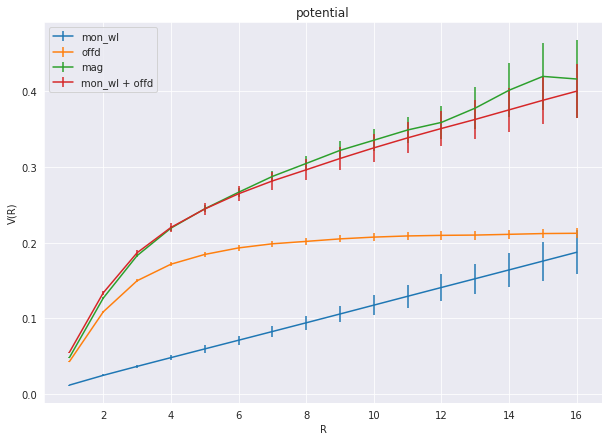

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
potential_plot_multiple(10, 0)

In [101]:
def plot_potential_df_space(data):
    print('time_size =', data['time_size'].iloc[0])
    data.plot(x = 'space_size', y = 'potential', yerr = 'err', style='.')
    plt.show()
    
def plot_potential_df_time(data):
    print('space_size =', data['space_size'].iloc[0])
    data.plot(x = 'time_size', y = 'potential', yerr = 'err', style='.')
    plt.show()
    
def plot_potential_df_space_several(data):
    print('time_size =', data['time_size'].iloc[0])
    ax = data[data['type'] == "monopole"].plot(x = 'space_size', y = 'potential', yerr = 'err', style='.')
    data[data['type'] == "monopoless"].plot(x = 'space_size', y = 'potential', yerr = 'err', style='.', ax = ax)
    data[data['type'] == "full"].plot(x = 'space_size', y = 'potential', yerr = 'err', style='.', ax = ax)
    data[data['type'] == "sum"].plot(x = 'space_size', y = 'potential', yerr = 'err', style='.', ax = ax)
    ax.legend(["monopole", "monopoless", "full", "sum",]);
    plt.show()

In [102]:
def plot_potential_test(data, time):
    x = data[data['time_size'] == time][['space_size']].to_numpy()
    y1 = data[data['time_size'] == time][['potential']].to_numpy()
    y2 = data[data['time_size'] == time + 1][['potential']].to_numpy()
    y = -np.log(y2/y1)
    x = np.transpose(x)
    y = np.transpose(y)
    plt.plot(x[0], y[0])
    plt.show()

time_size = 4


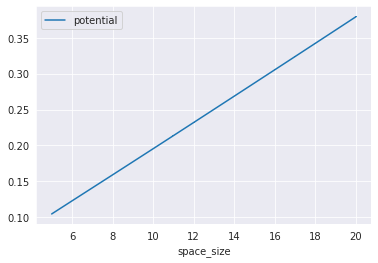

time_size = 5


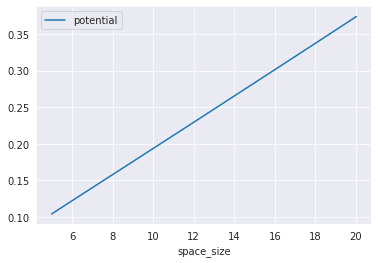

time_size = 6


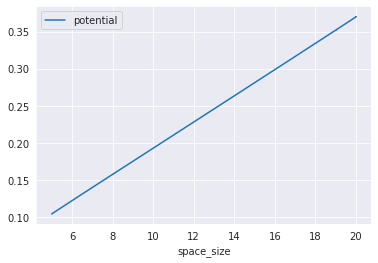

time_size = 7


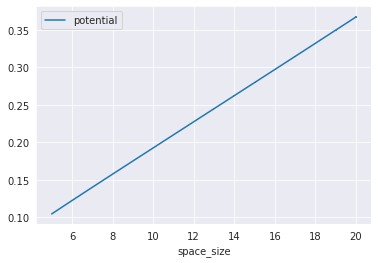

time_size = 8


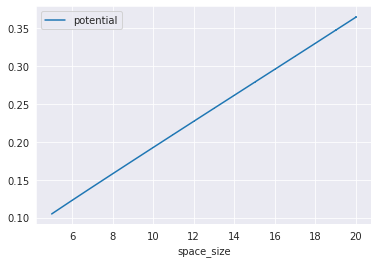

time_size = 9


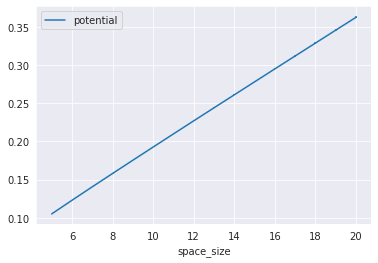

time_size = 10


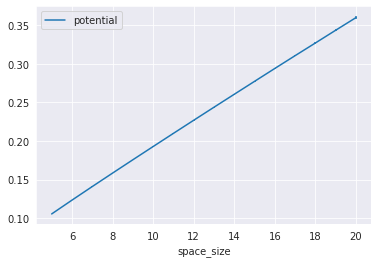

time_size = 11


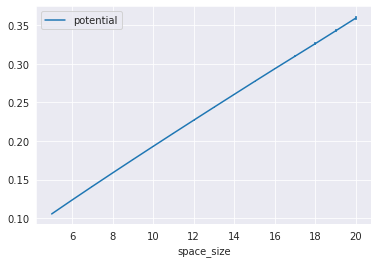

time_size = 12


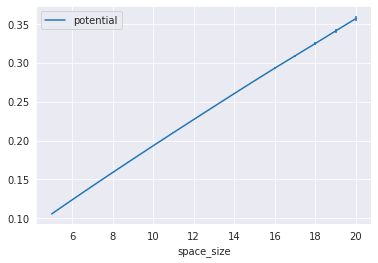

time_size = 13


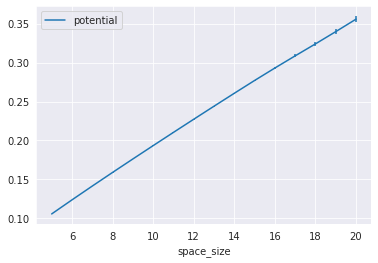

time_size = 14


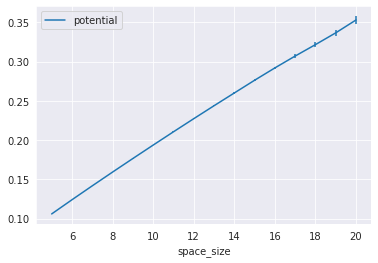

time_size = 15


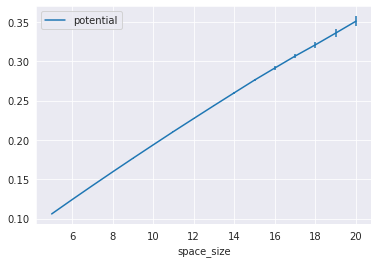

time_size = 16


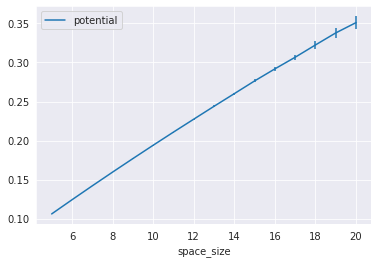

time_size = 17


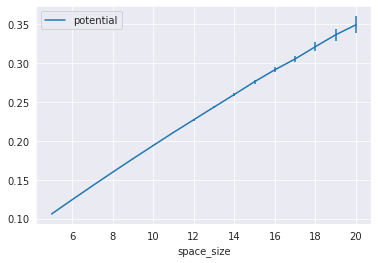

time_size = 18


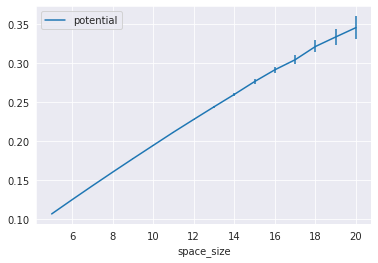

time_size = 19


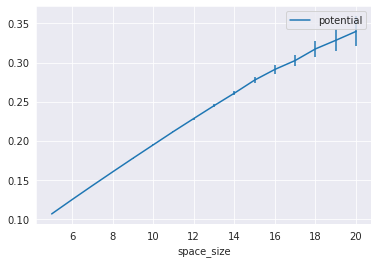

Empty DataFrame
Columns: []
Index: []

In [108]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/40^4/unsmeared/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


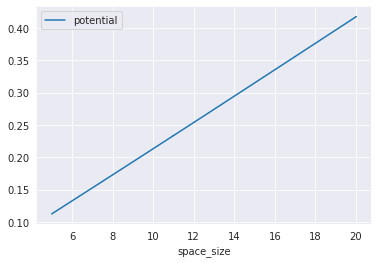

time_size = 5


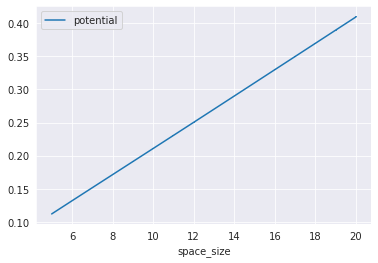

time_size = 6


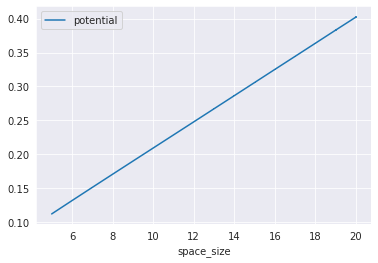

time_size = 7


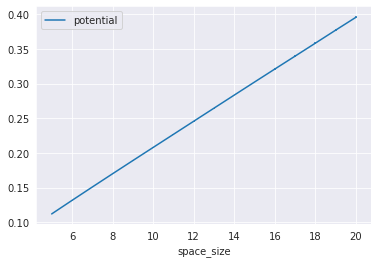

time_size = 8


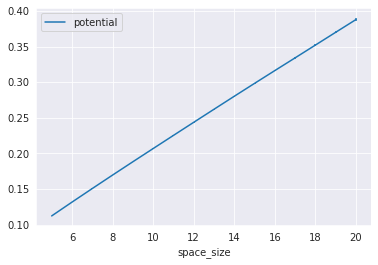

time_size = 9


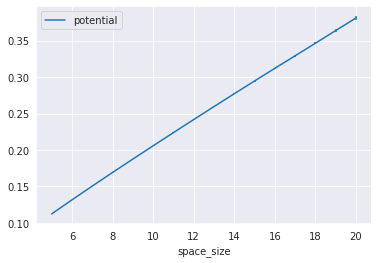

time_size = 10


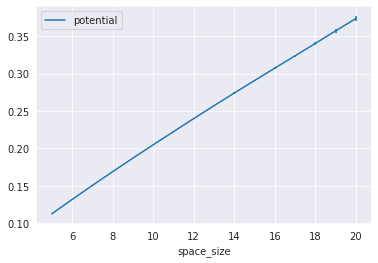

time_size = 11


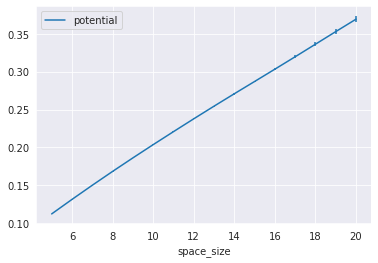

time_size = 12


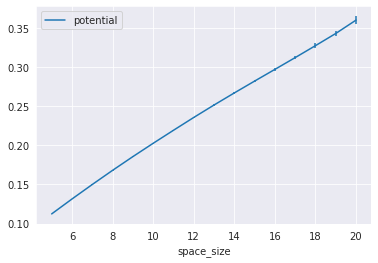

time_size = 13


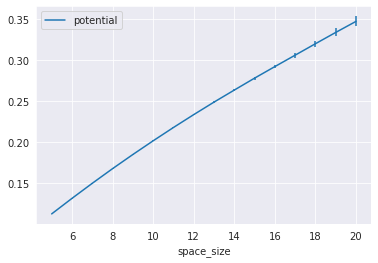

time_size = 14


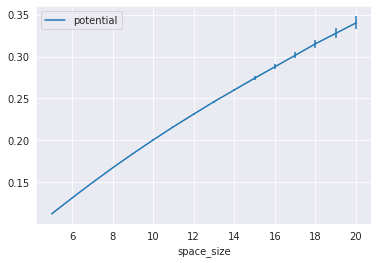

time_size = 15


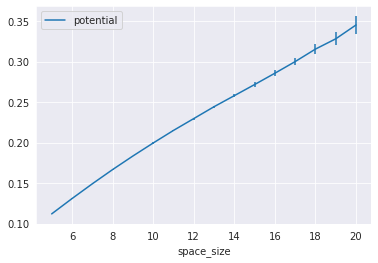

time_size = 16


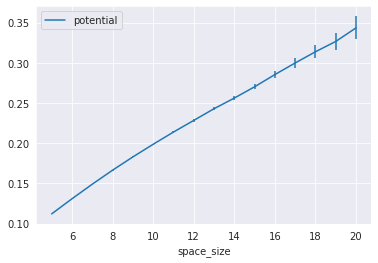

time_size = 17


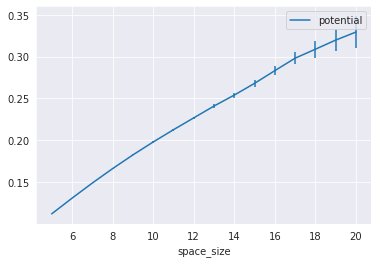

time_size = 18


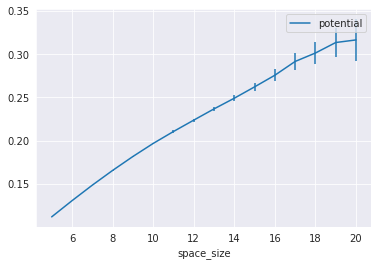

time_size = 19


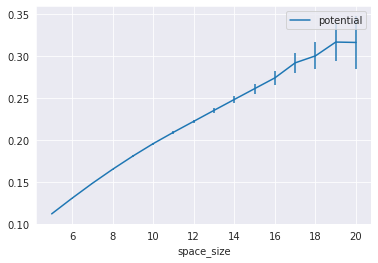

Empty DataFrame
Columns: []
Index: []

In [109]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/40^4/unsmeared/potential_mu=0.35.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


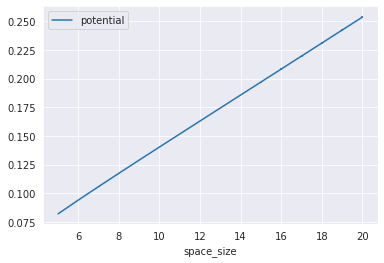

time_size = 5


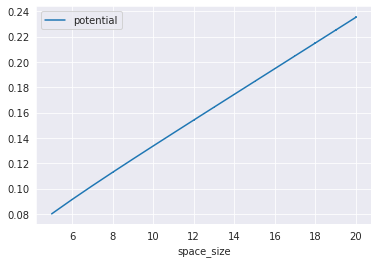

time_size = 6


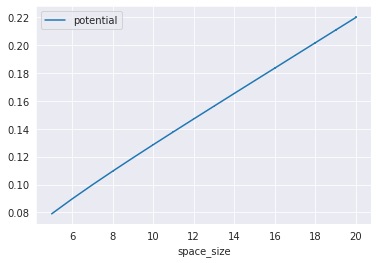

time_size = 7


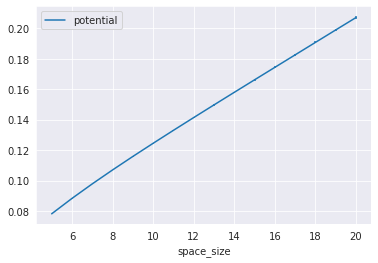

time_size = 8


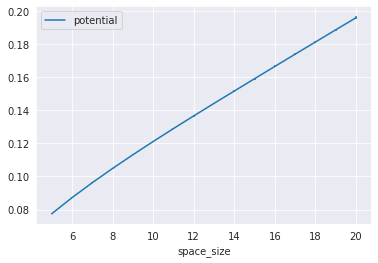

time_size = 9


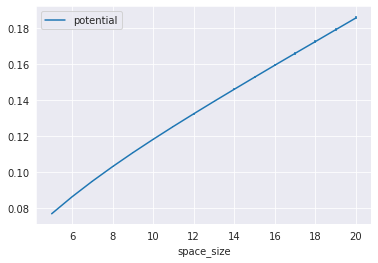

time_size = 10


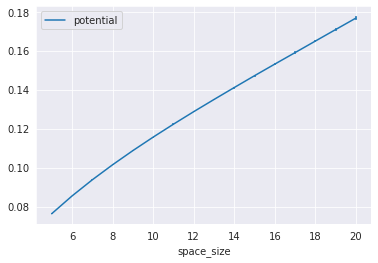

time_size = 11


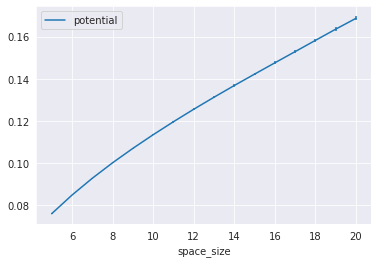

time_size = 12


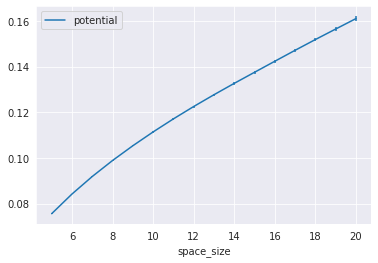

time_size = 13


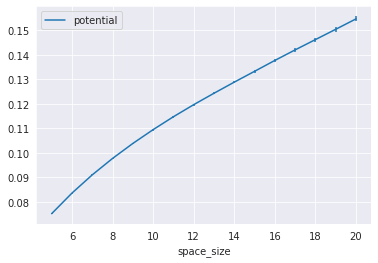

time_size = 14


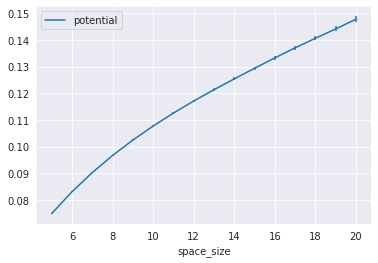

time_size = 15


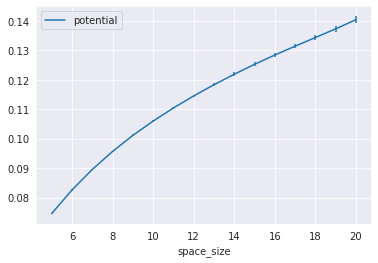

time_size = 16


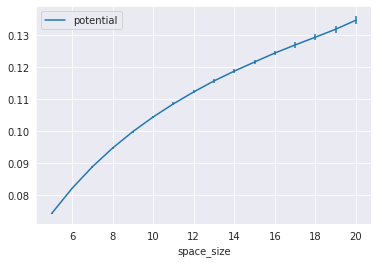

time_size = 17


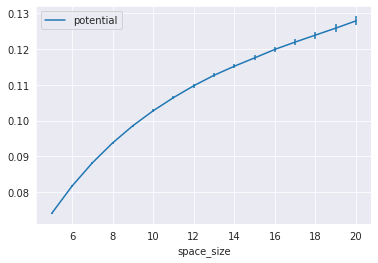

time_size = 18


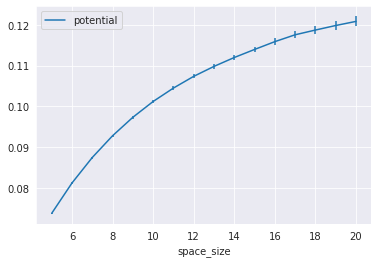

time_size = 19


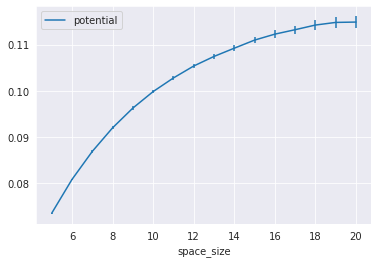

Empty DataFrame
Columns: []
Index: []

In [110]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/40^4/unsmeared/potential_mu=0.45.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


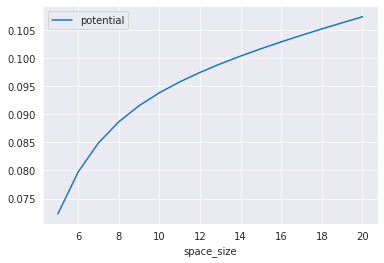

time_size = 5


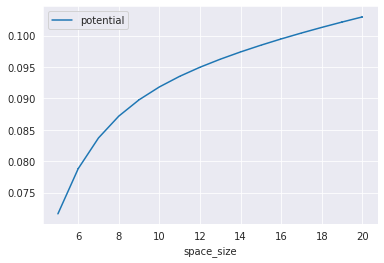

time_size = 6


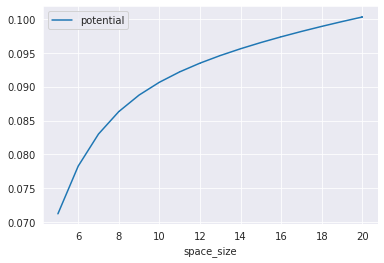

time_size = 7


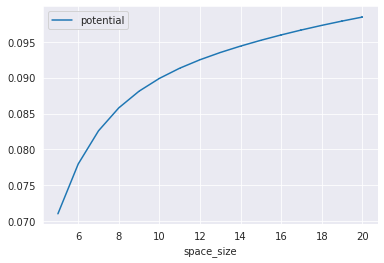

time_size = 8


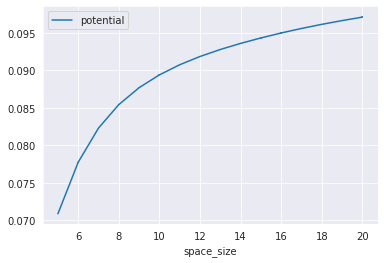

time_size = 9


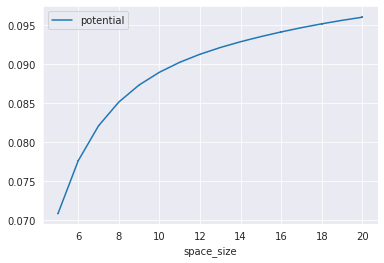

time_size = 10


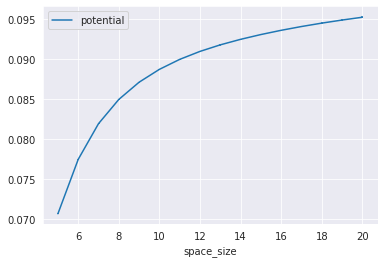

time_size = 11


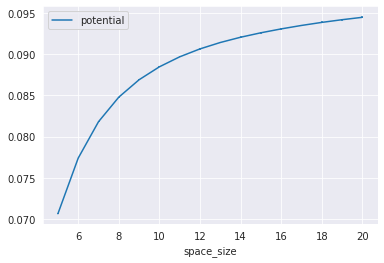

time_size = 12


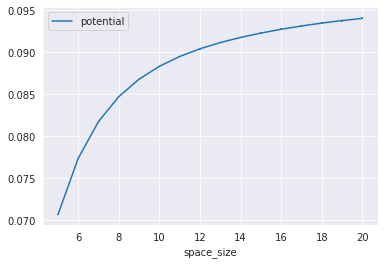

time_size = 13


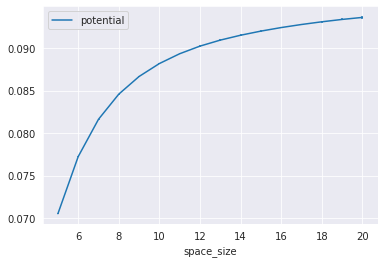

time_size = 14


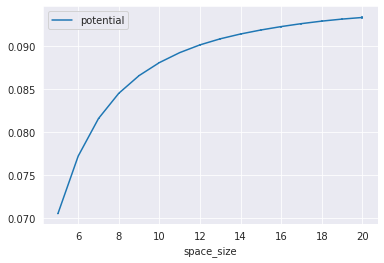

time_size = 15


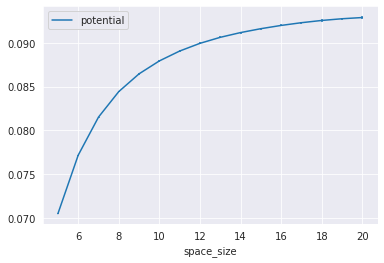

time_size = 16


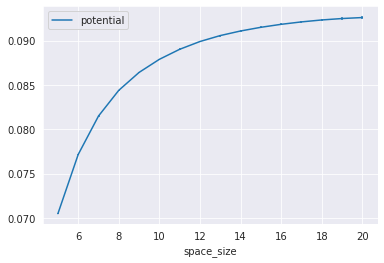

time_size = 17


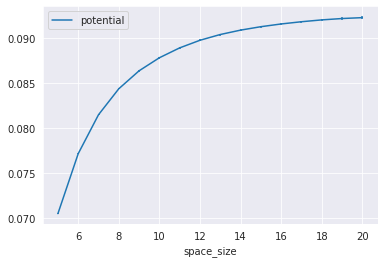

time_size = 18


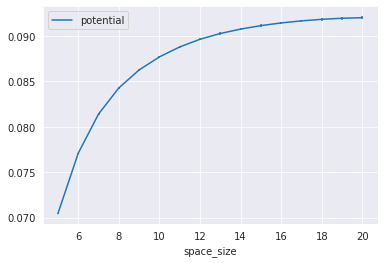

time_size = 19


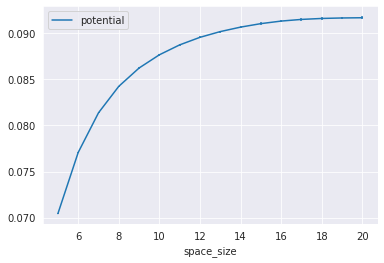

Empty DataFrame
Columns: []
Index: []

In [98]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopoless/qc2dstag/40^4/HYP2_APE/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


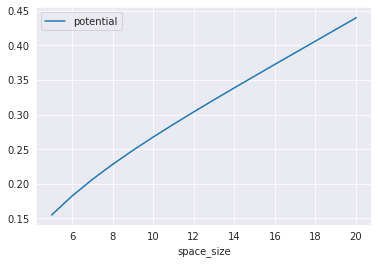

time_size = 5


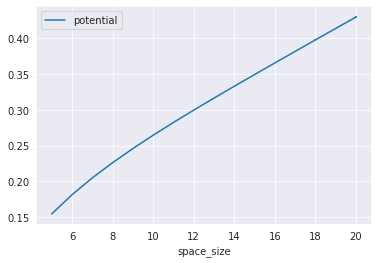

time_size = 6


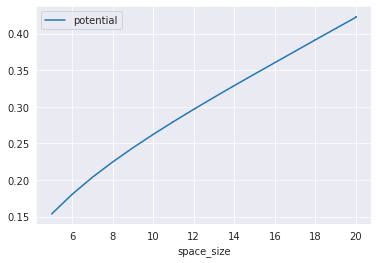

time_size = 7


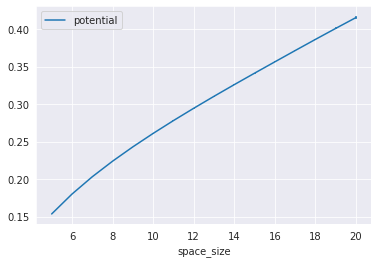

time_size = 8


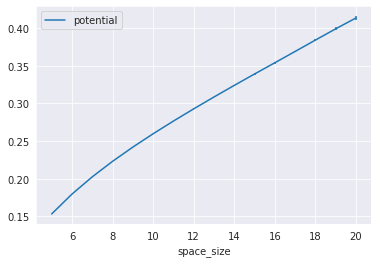

time_size = 9


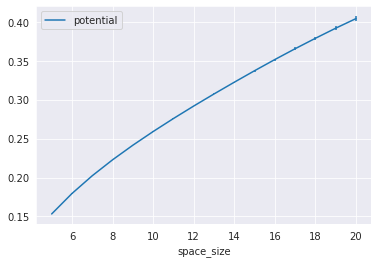

time_size = 10


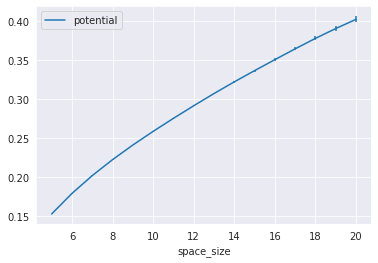

time_size = 11


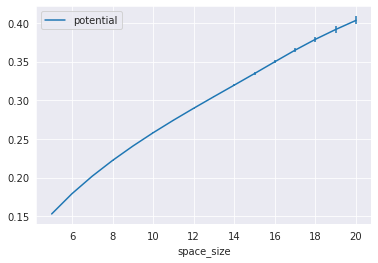

time_size = 12


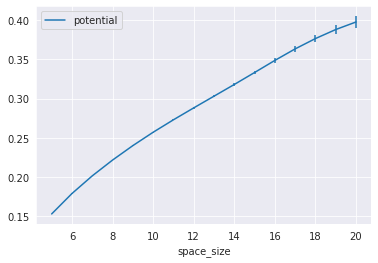

time_size = 13


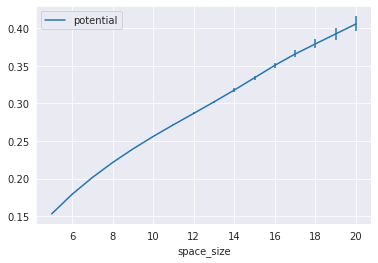

time_size = 14


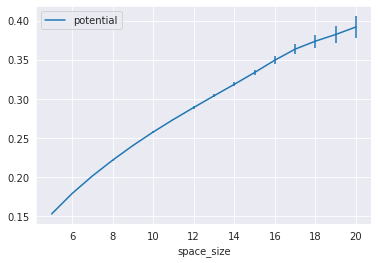

time_size = 15


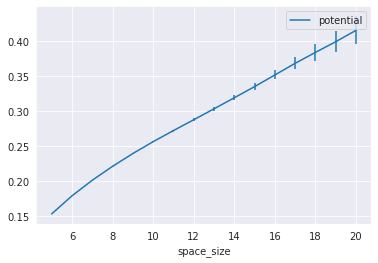

time_size = 16


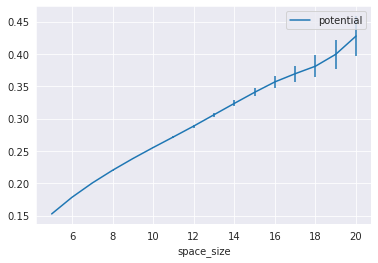

time_size = 17


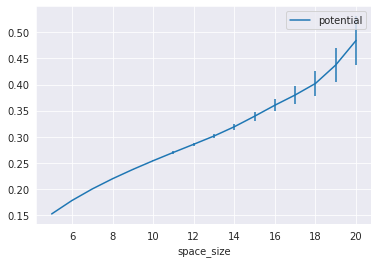

time_size = 18


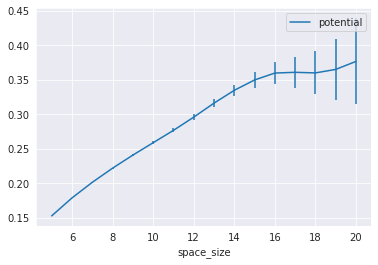

time_size = 19


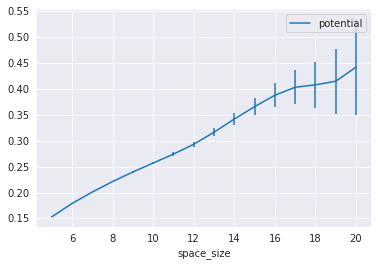

Empty DataFrame
Columns: []
Index: []

In [9]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/qc2dstag/40^4/HYP6_APE/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


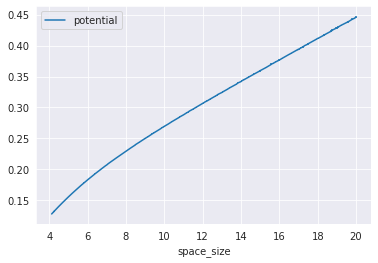

time_size = 5


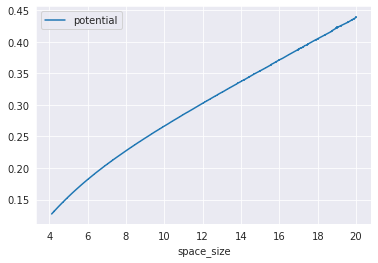

time_size = 6


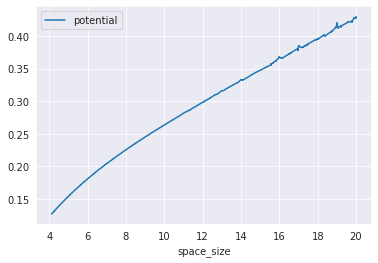

time_size = 7


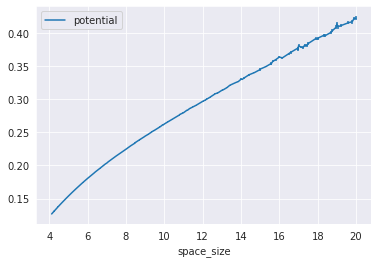

time_size = 8


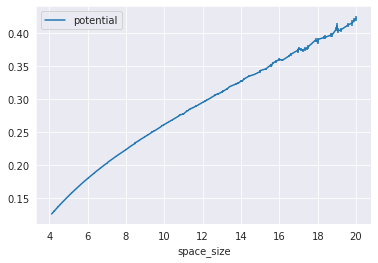

time_size = 9


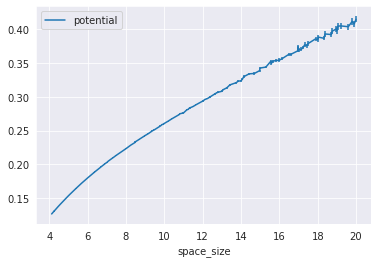

time_size = 10


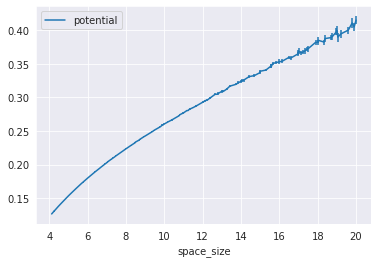

time_size = 11


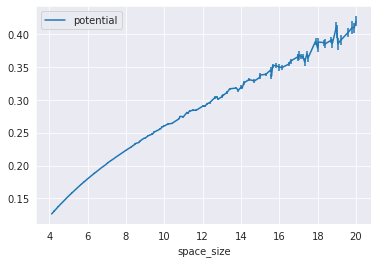

time_size = 12


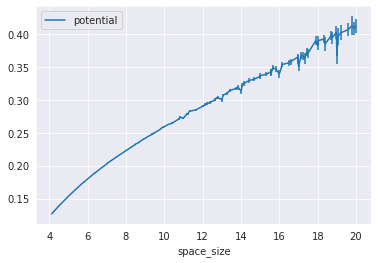

time_size = 13


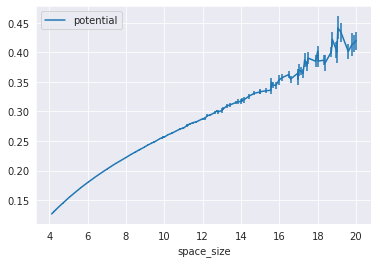

time_size = 14


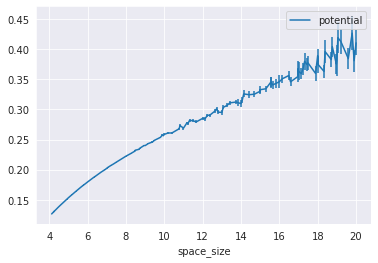

time_size = 15


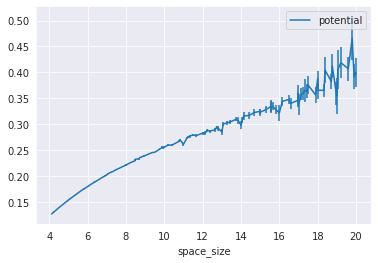

time_size = 16


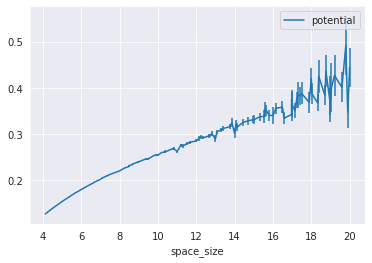

time_size = 17


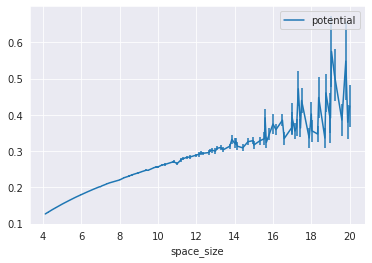

time_size = 18


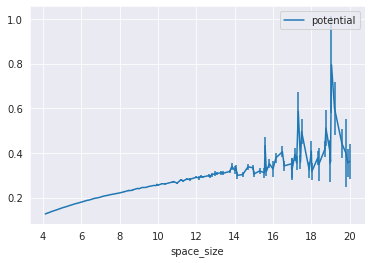

time_size = 19


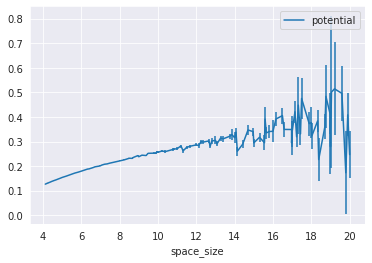

Empty DataFrame
Columns: []
Index: []

In [5]:
df_data_40_5 = pd.read_csv(f"../result/potential/qc2dstag/40^4/HYP6_APE/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

space_size = 4.123105625617661


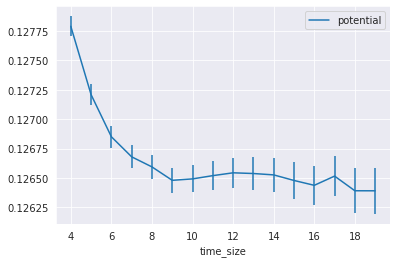

space_size = 4.242640687119285


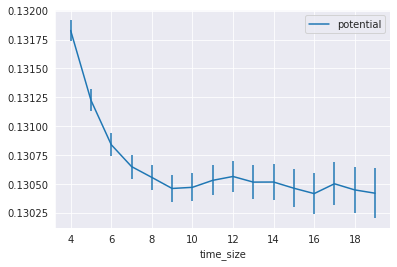

space_size = 4.242640687119286


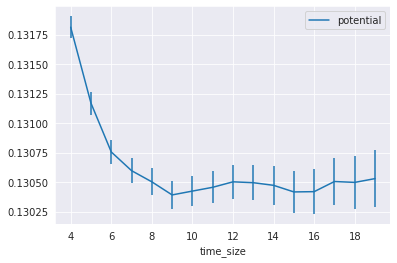

space_size = 4.358898943540674


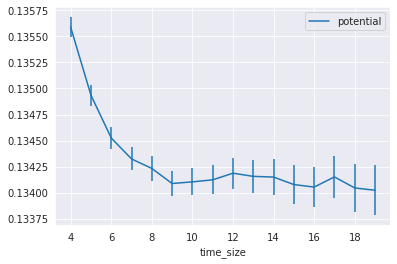

space_size = 4.47213595499958


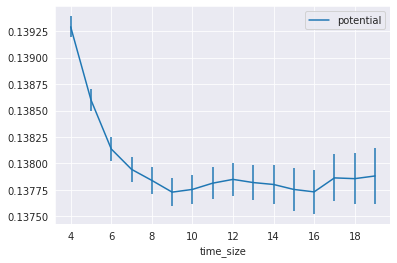

space_size = 4.58257569495584


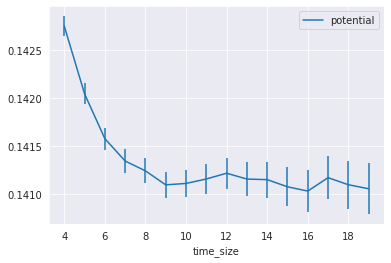

space_size = 4.69041575982343


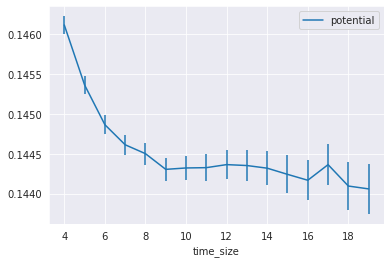

space_size = 4.898979485566356


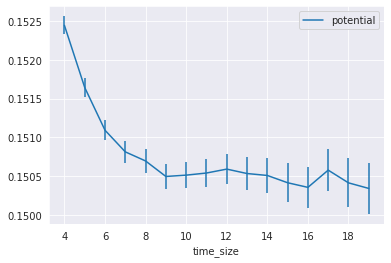

space_size = 5.0


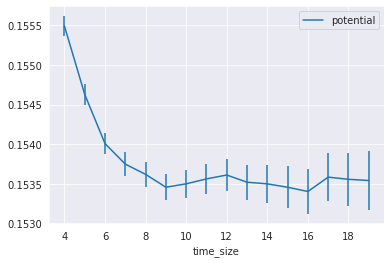

space_size = 5.0990195135927845


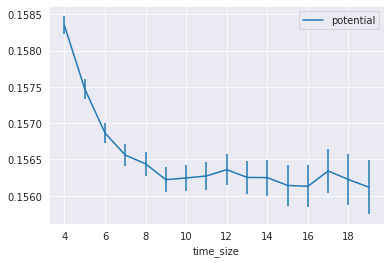

space_size = 5.196152422706632


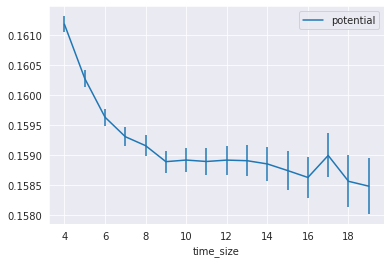

space_size = 5.385164807134504


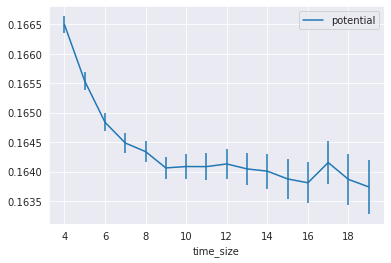

space_size = 5.656854249492381


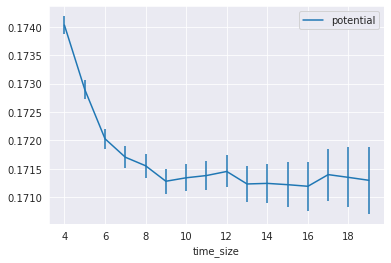

space_size = 5.744562646538029


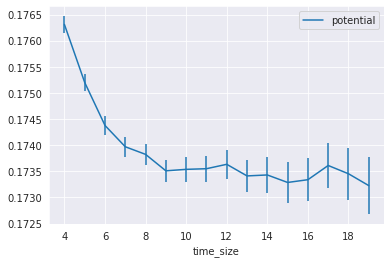

space_size = 5.830951894845301


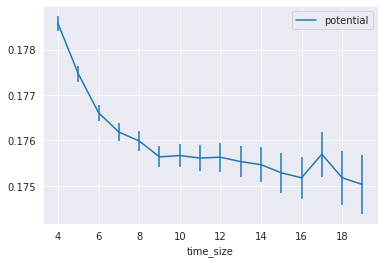

space_size = 6.0


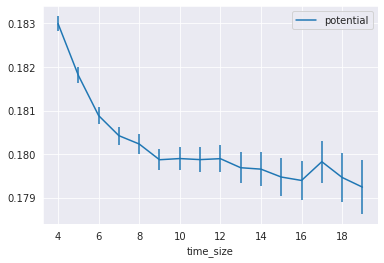

space_size = 6.324555320336759


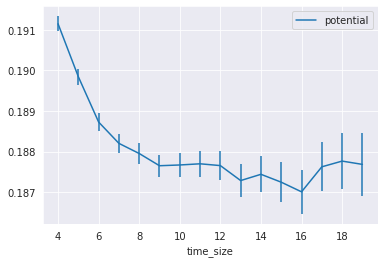

space_size = 6.4031242374328485


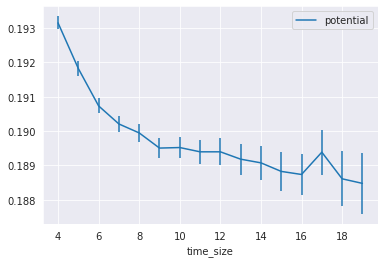

space_size = 6.6332495807108


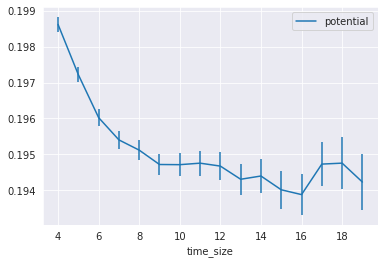

space_size = 6.708203932499369


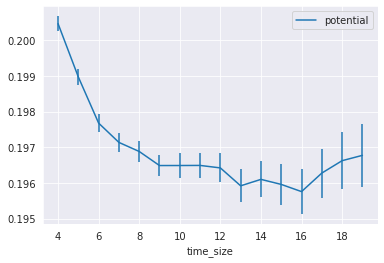

space_size = 6.928203230275509


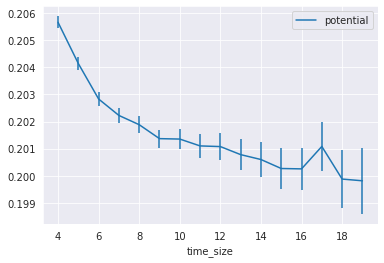

space_size = 7.0


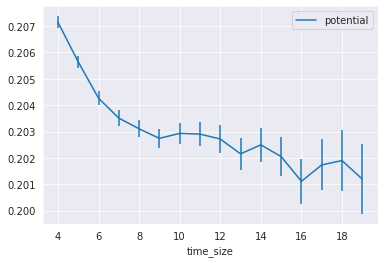

space_size = 7.071067811865476


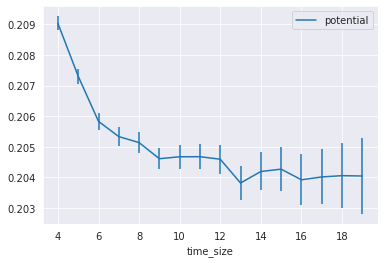

space_size = 7.211102550927977


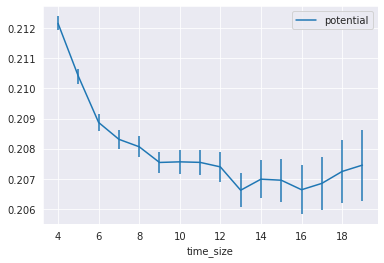

space_size = 7.348469228349533


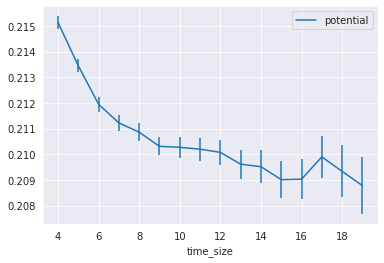

space_size = 7.483314773547882


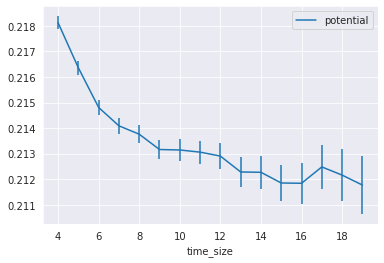

space_size = 8.0


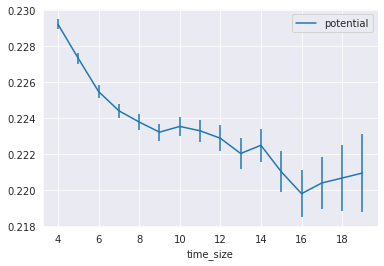

space_size = 8.246211251235321


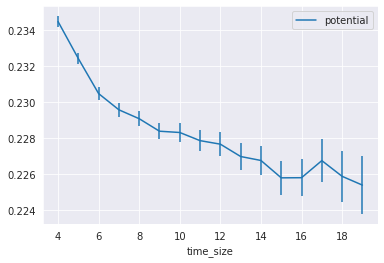

space_size = 8.48528137423857


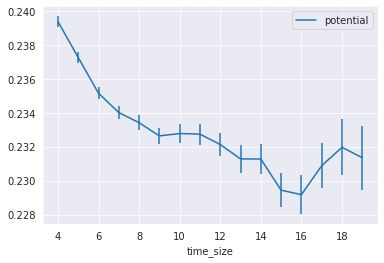

space_size = 8.485281374238571


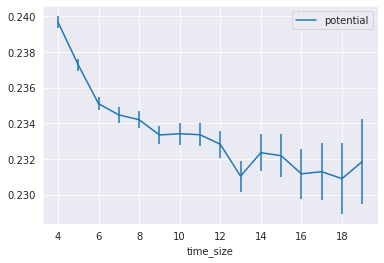

space_size = 8.660254037844386


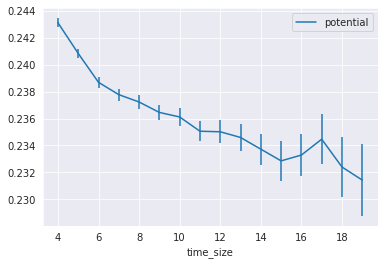

space_size = 8.717797887081348


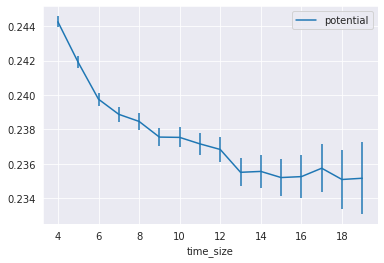

space_size = 8.94427190999916


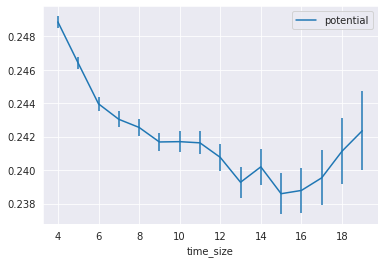

space_size = 9.0


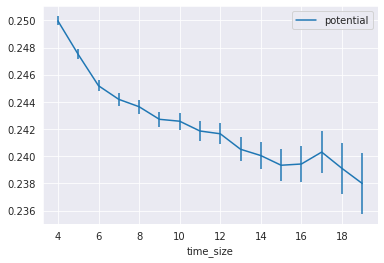

space_size = 9.16515138991168


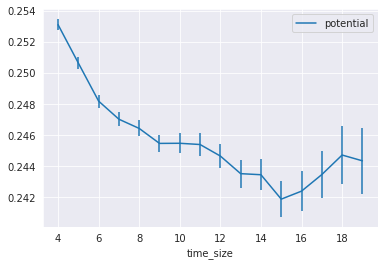

space_size = 9.38083151964686


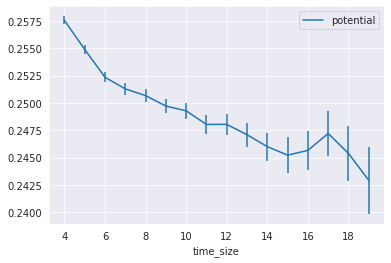

space_size = 9.486832980505138


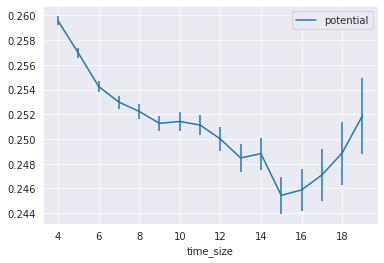

space_size = 9.797958971132712


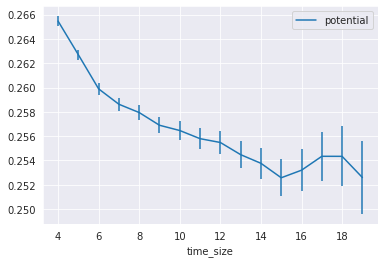

space_size = 9.899494936611664


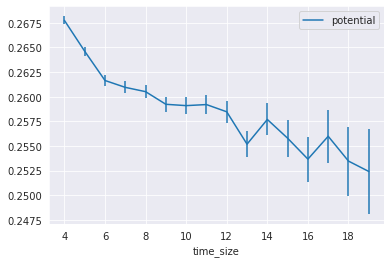

space_size = 9.9498743710662


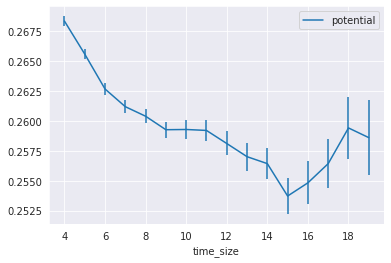

space_size = 10.0


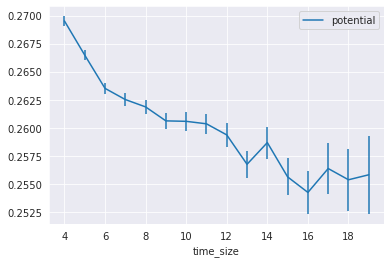

space_size = 10.198039027185567


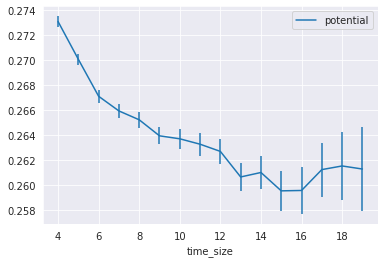

space_size = 10.392304845413264


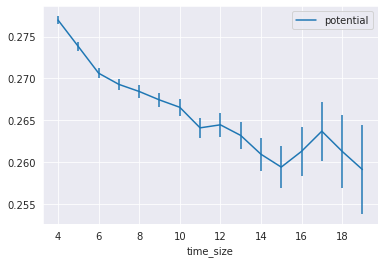

space_size = 10.770329614269007


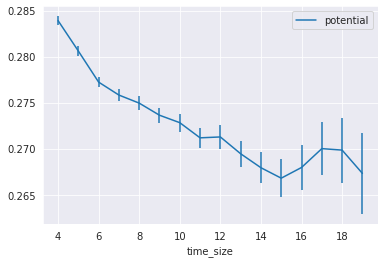

space_size = 10.816653826391969


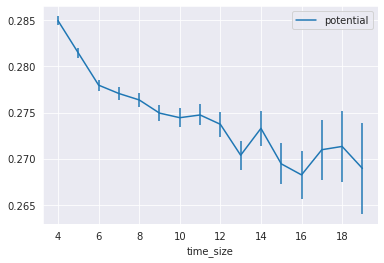

space_size = 11.0


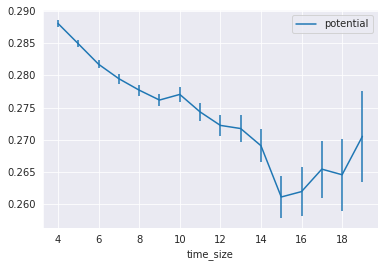

space_size = 11.180339887498947


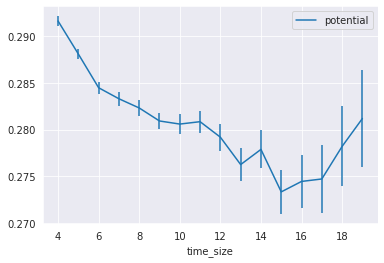

space_size = 11.224972160321824


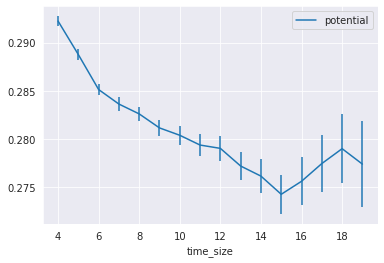

space_size = 11.31370849898476


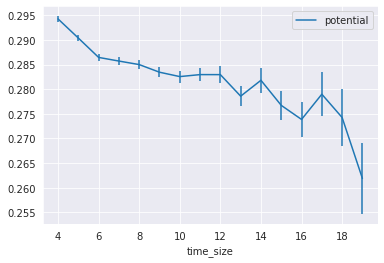

space_size = 11.489125293076055


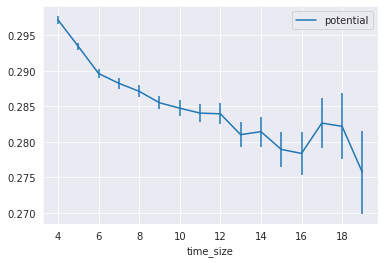

space_size = 11.6619037896906


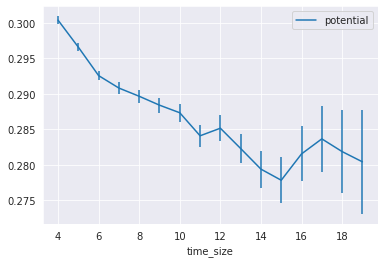

space_size = 12.0


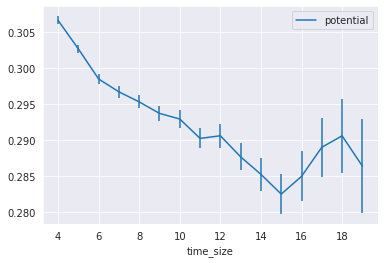

space_size = 12.12435565298214


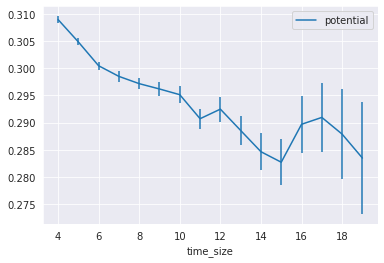

space_size = 12.24744871391589


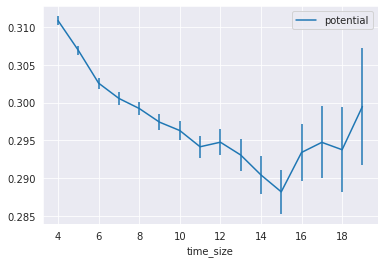

space_size = 12.36931687685298


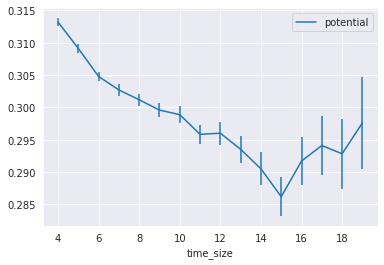

space_size = 12.649110640673518


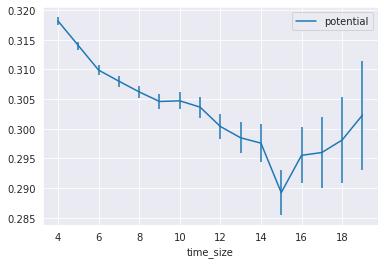

space_size = 12.727922061357855


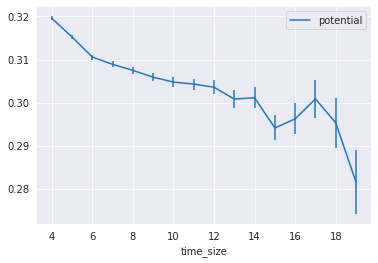

space_size = 12.806248474865695


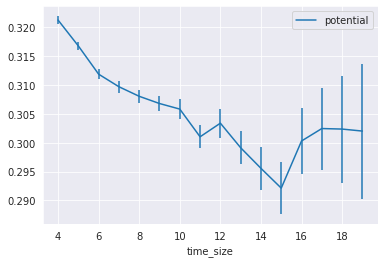

space_size = 13.0


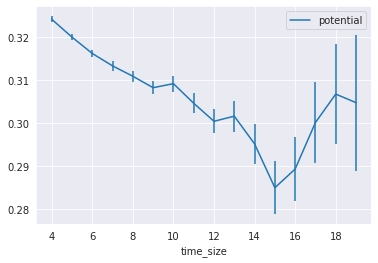

space_size = 13.076696830622025


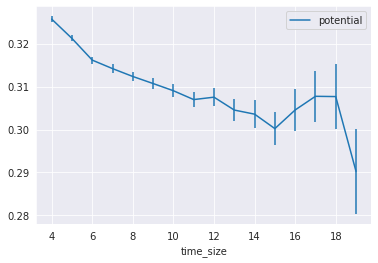

space_size = 13.2664991614216


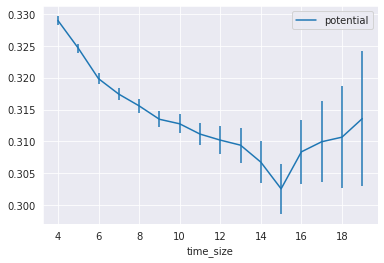

space_size = 13.41640786499874


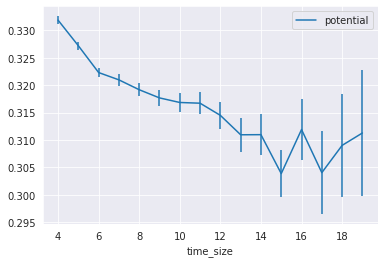

space_size = 13.74772708486752


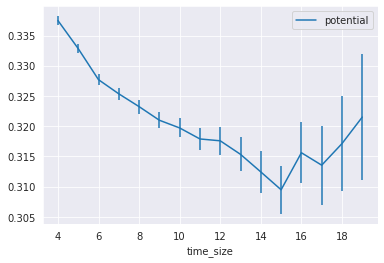

space_size = 13.856406460551018


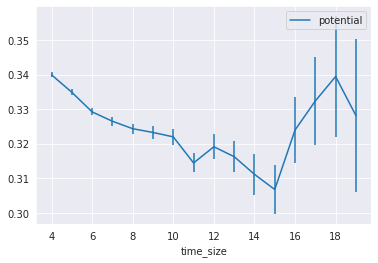

space_size = 14.0


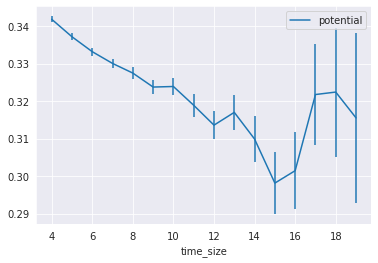

space_size = 14.071247279470288


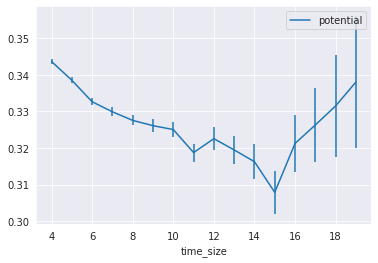

space_size = 14.142135623730953


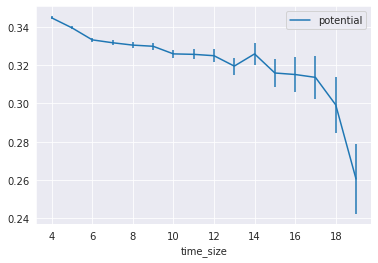

space_size = 14.422205101855956


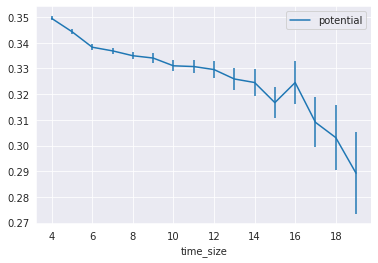

space_size = 14.696938456699067


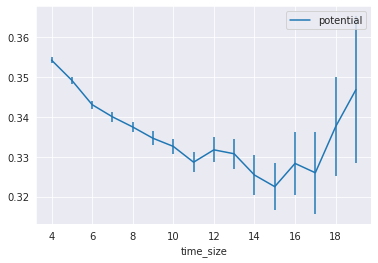

space_size = 14.966629547095764


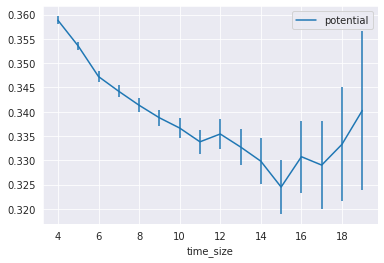

space_size = 15.0


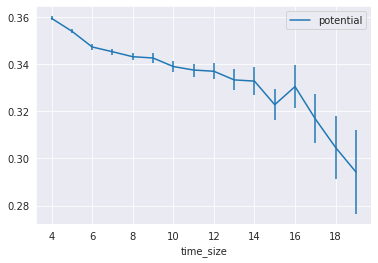

space_size = 15.297058540778352


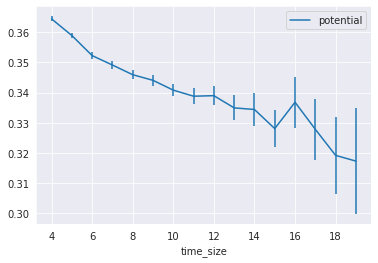

space_size = 15.556349186104049


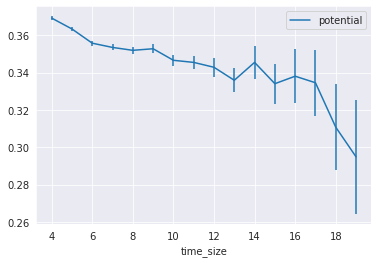

space_size = 15.588457268119894


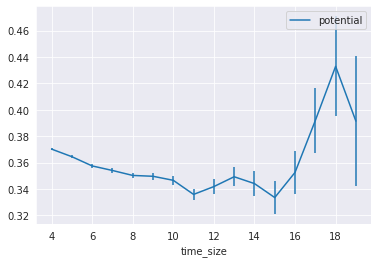

space_size = 15.652475842498529


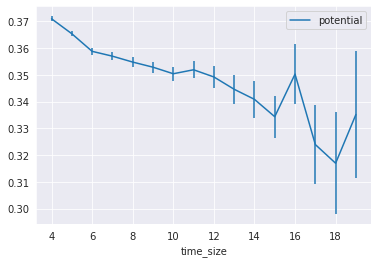

space_size = 15.811388300841898


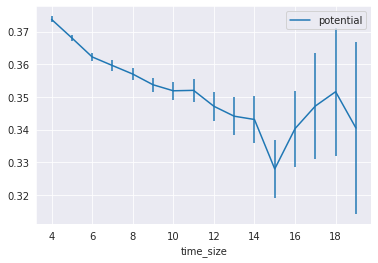

space_size = 16.0


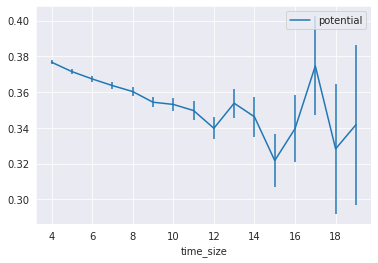

space_size = 16.15549442140351


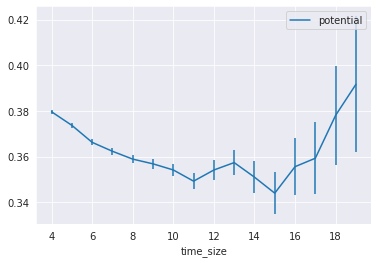

space_size = 16.492422502470642


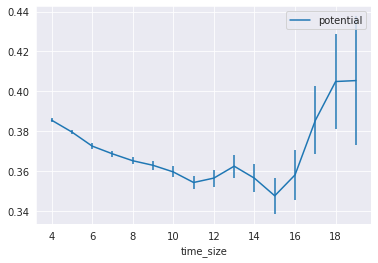

space_size = 16.583123951776997


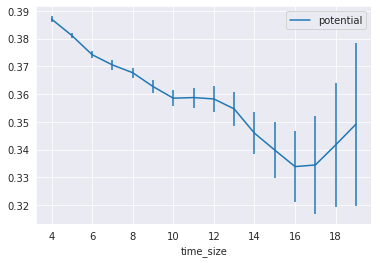

space_size = 16.97056274847714


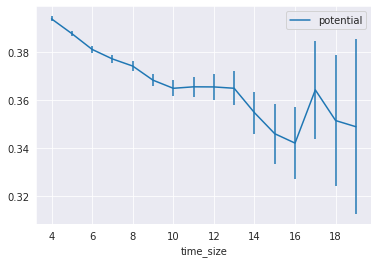

space_size = 16.970562748477143


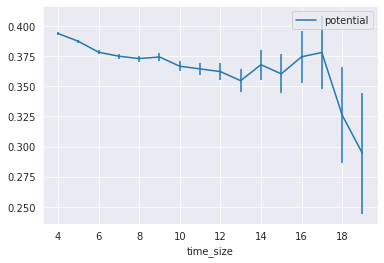

space_size = 17.0


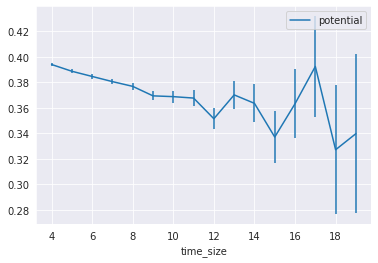

space_size = 17.146428199482244


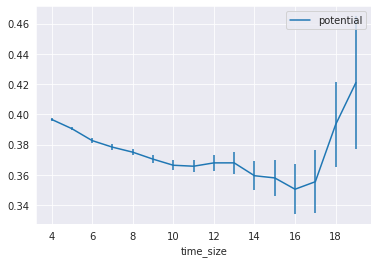

space_size = 17.233687939614086


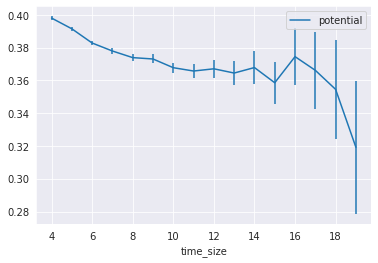

space_size = 17.32050807568877


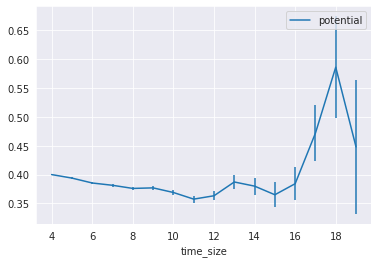

space_size = 17.435595774162696


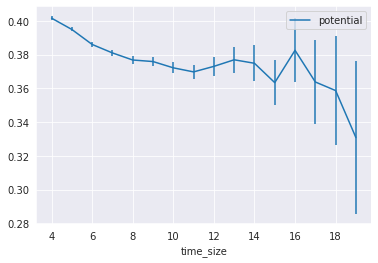

space_size = 17.492855684535904


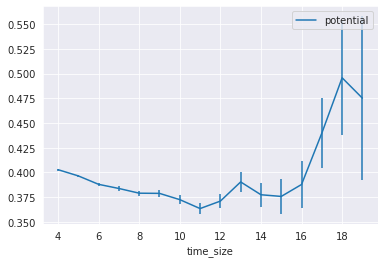

space_size = 17.88854381999832


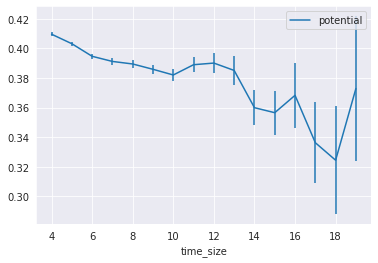

space_size = 18.0


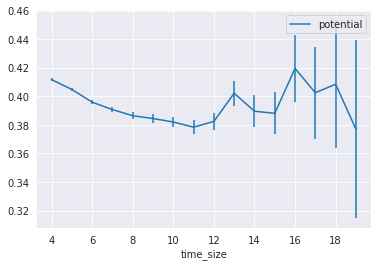

space_size = 18.027756377319943


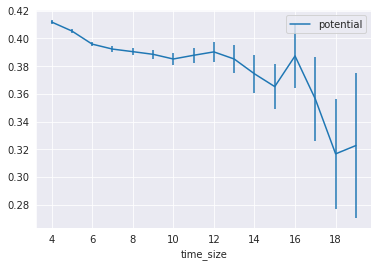

space_size = 18.33030277982336


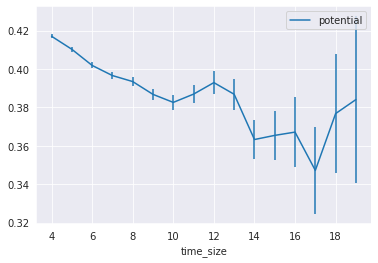

space_size = 18.38477631085024


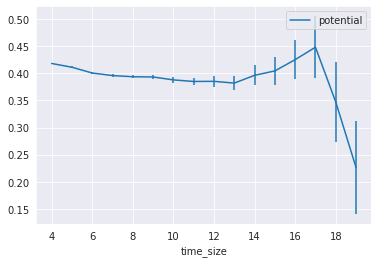

space_size = 18.708286933869708


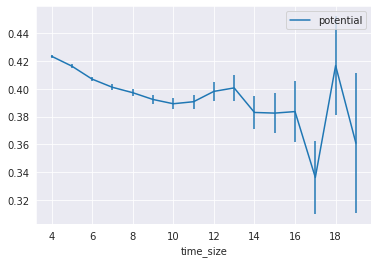

space_size = 18.76166303929372


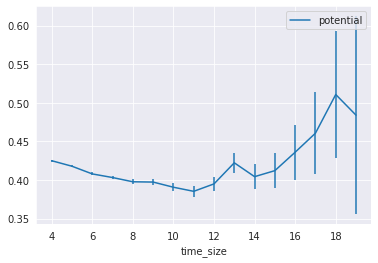

space_size = 18.97366596101028


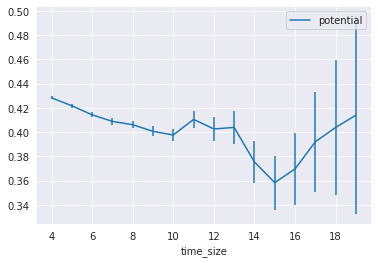

space_size = 19.0


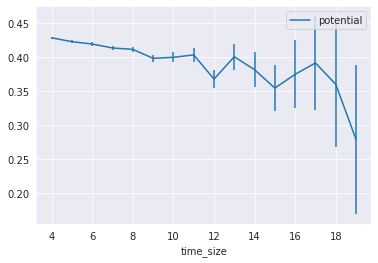

space_size = 19.05255888325765


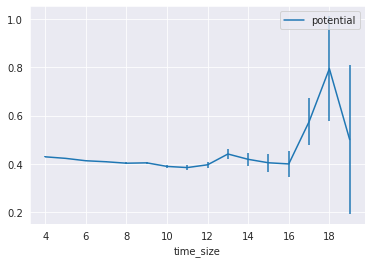

space_size = 19.209372712298546


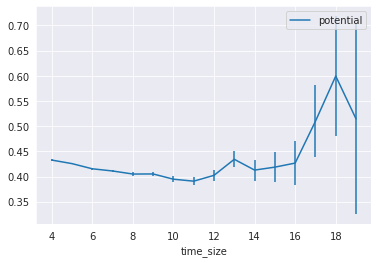

space_size = 19.595917942265423


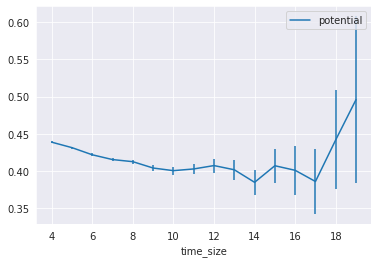

space_size = 19.798989873223327


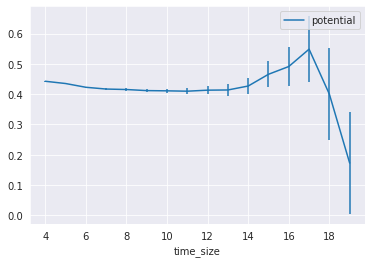

space_size = 19.8997487421324


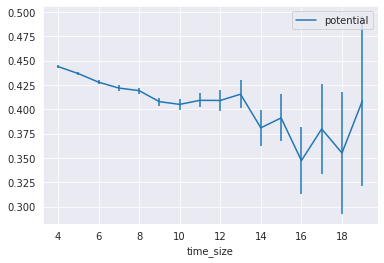

space_size = 20.0


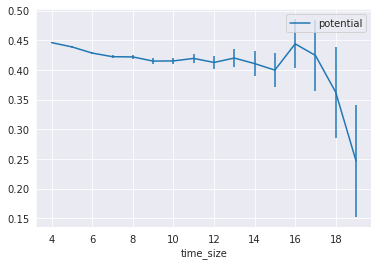

Empty DataFrame
Columns: []
Index: []

In [13]:
df_data_40_5 = pd.read_csv(f"../result/potential/qc2dstag/40^4/HYP6_APE/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['space_size']).apply(plot_potential_df_time)

time_size = 4


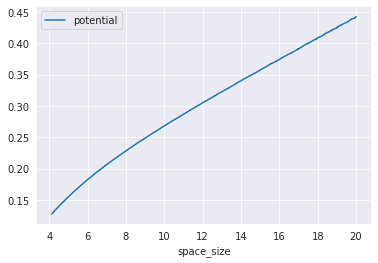

time_size = 5


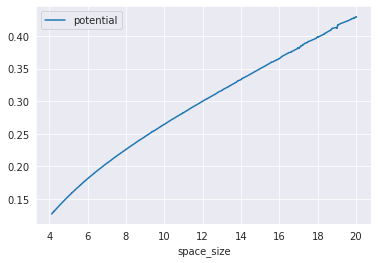

time_size = 6


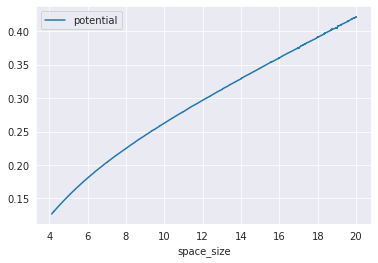

time_size = 7


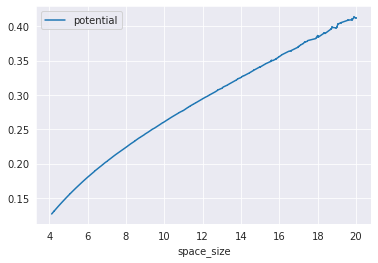

time_size = 8


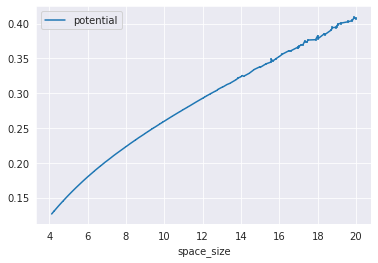

time_size = 9


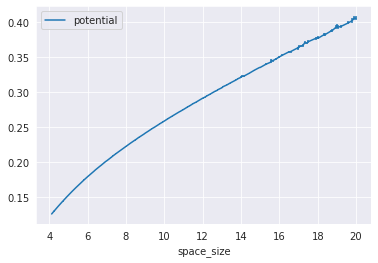

time_size = 10


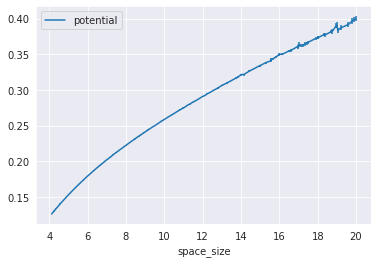

time_size = 11


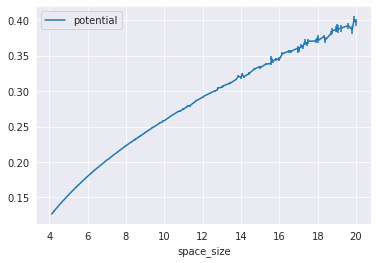

time_size = 12


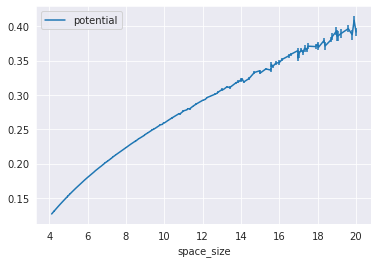

time_size = 13


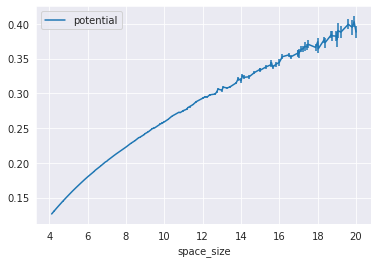

time_size = 14


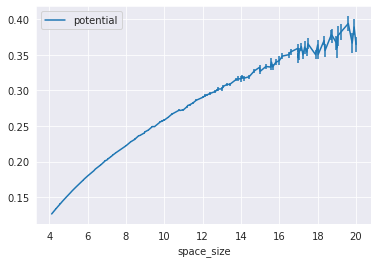

time_size = 15


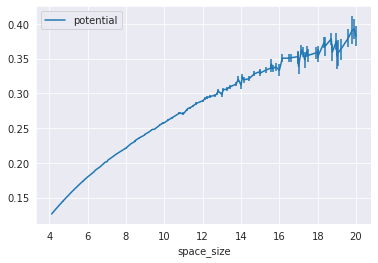

time_size = 16


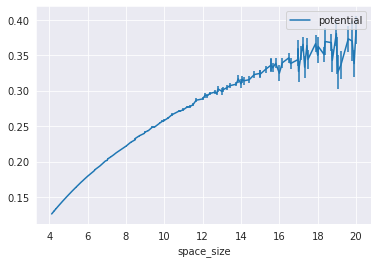

time_size = 17


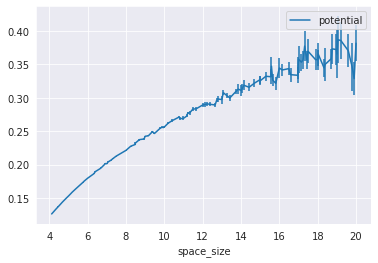

time_size = 18


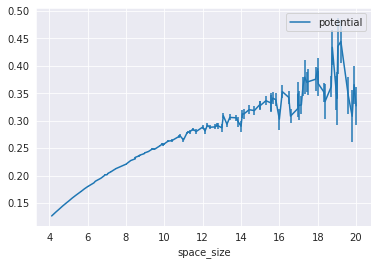

time_size = 19


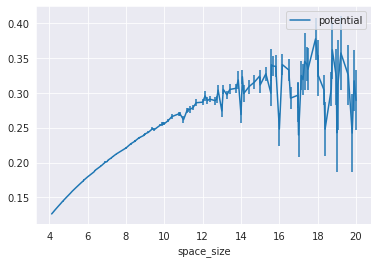

Empty DataFrame
Columns: []
Index: []

In [5]:
df_data_32_0 = pd.read_csv(f"../result/potential/qc2dstag/32^4/HYP6_APE/potential_mu=0.00.csv", index_col=None)
df_data_32_0.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


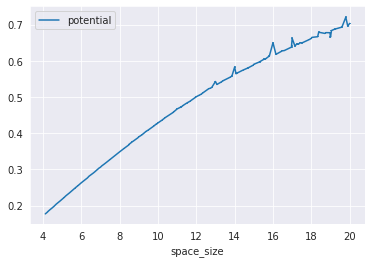

time_size = 5


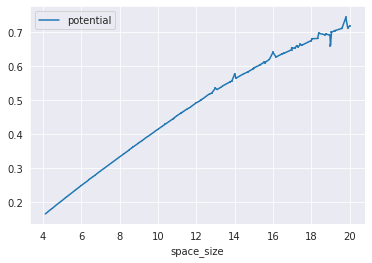

time_size = 6


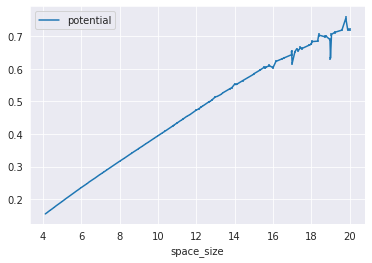

time_size = 7


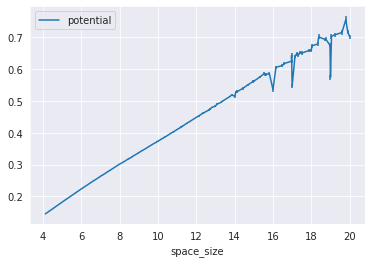

time_size = 8


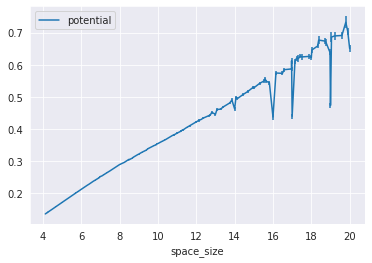

time_size = 9


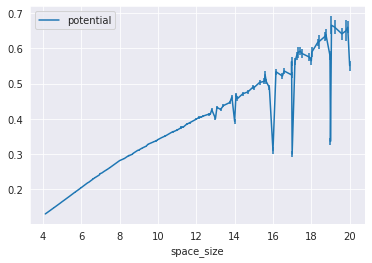

time_size = 10


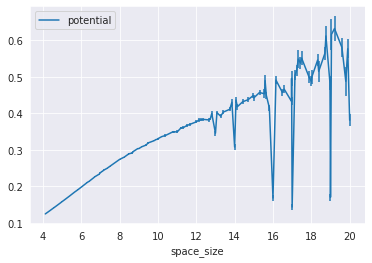

time_size = 11


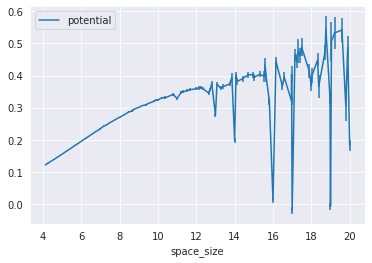

time_size = 12


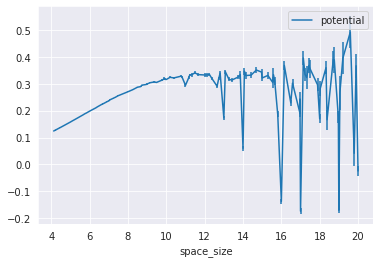

time_size = 13


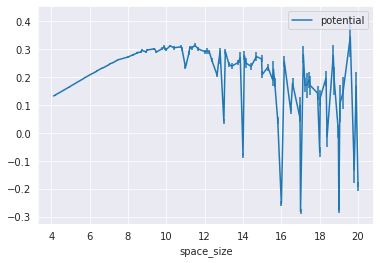

time_size = 14


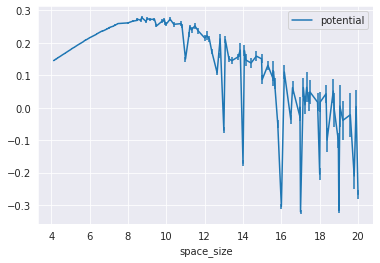

time_size = 15


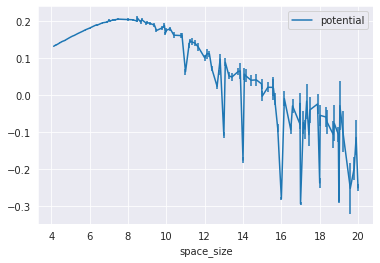

time_size = 16


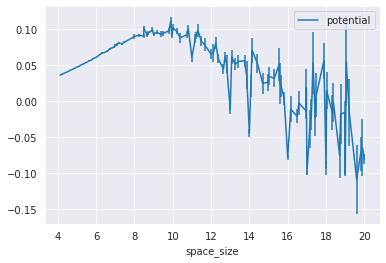

time_size = 17


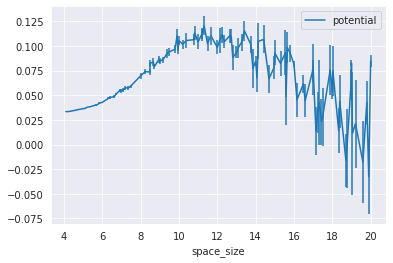

time_size = 18


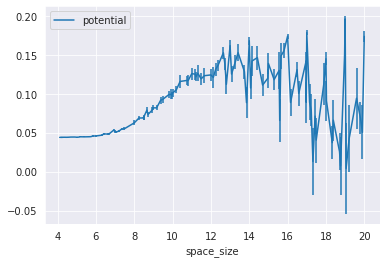

time_size = 19


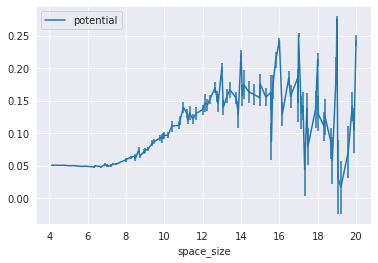

Empty DataFrame
Columns: []
Index: []

In [16]:
df_data_32_0_monopole = pd.read_csv(f"../result/potential/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None)
df_data_32_0_monopole.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


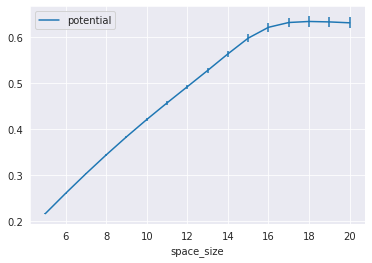

time_size = 5


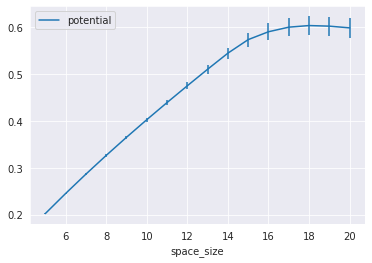

time_size = 6


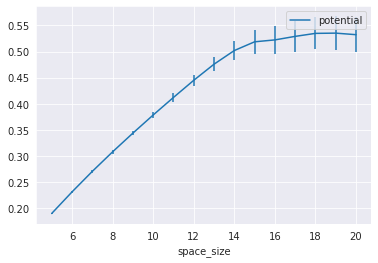

time_size = 7


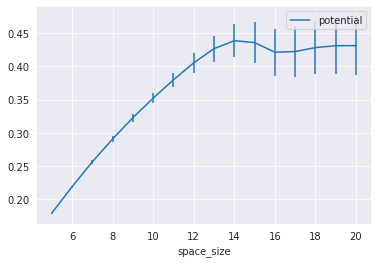

time_size = 8


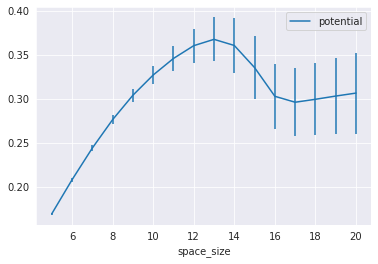

time_size = 9


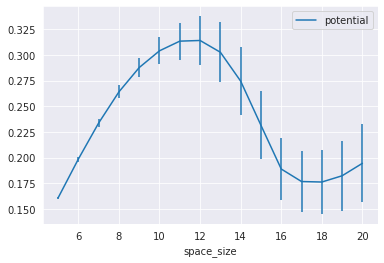

time_size = 10


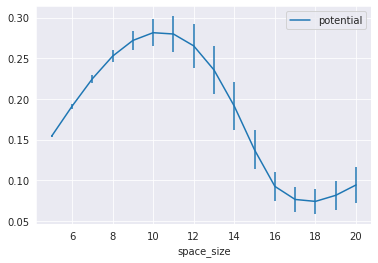

time_size = 11


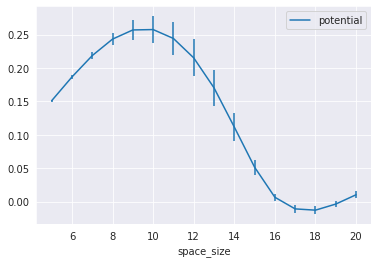

time_size = 12


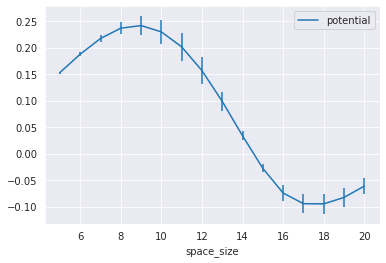

time_size = 13


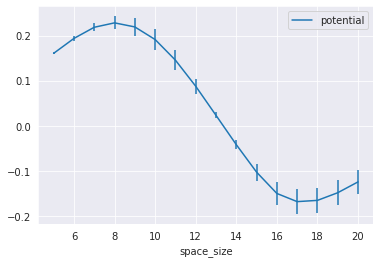

time_size = 14


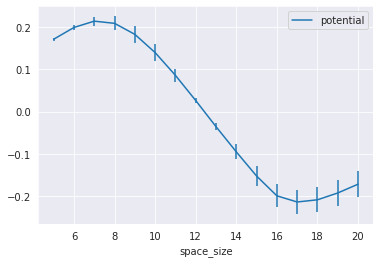

time_size = 15


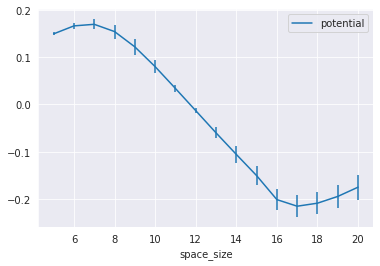

time_size = 16


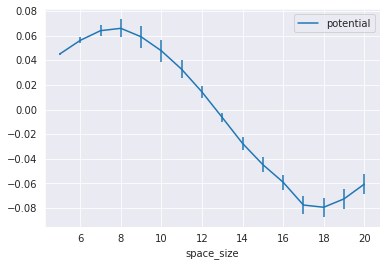

time_size = 17


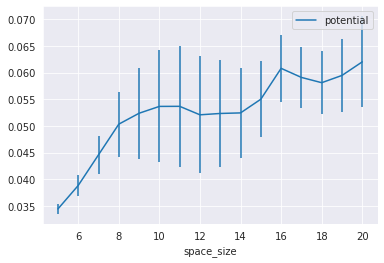

time_size = 18


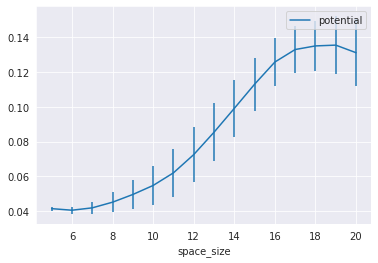

time_size = 19


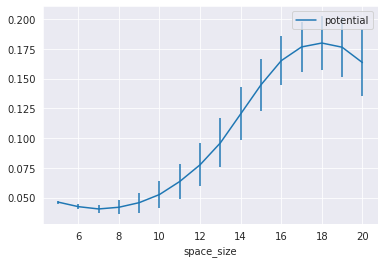

Empty DataFrame
Columns: []
Index: []

In [8]:
df_data_32_0_monopole = pd.read_csv(f"../result/potential/test/on-axis/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None)
df_data_32_0_monopole.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


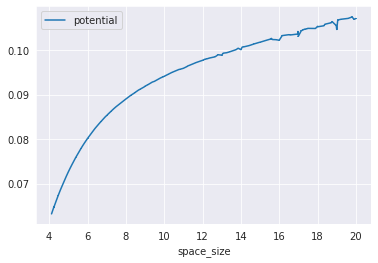

time_size = 5


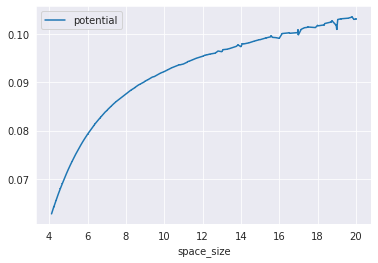

time_size = 6


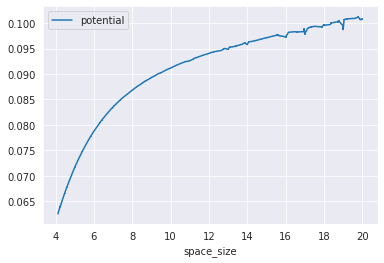

time_size = 7


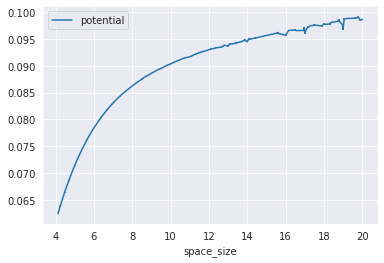

time_size = 8


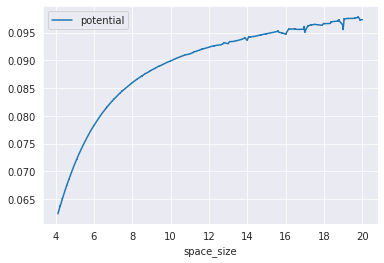

time_size = 9


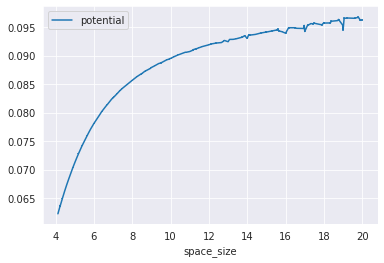

time_size = 10


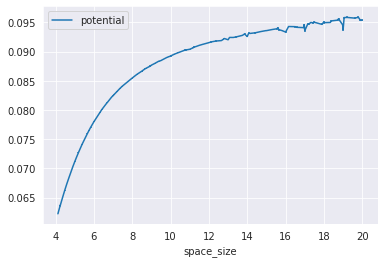

time_size = 11


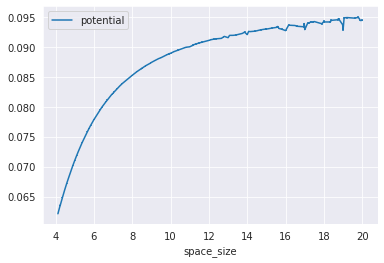

time_size = 12


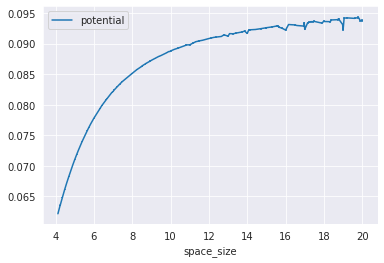

time_size = 13


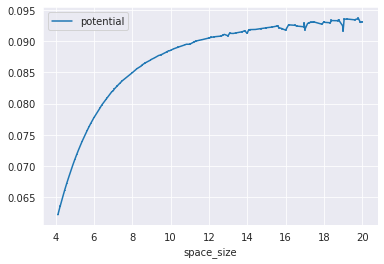

time_size = 14


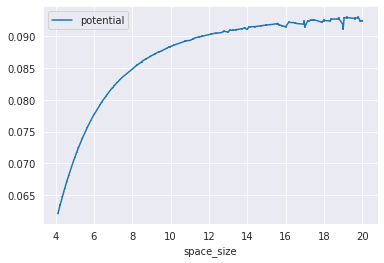

time_size = 15


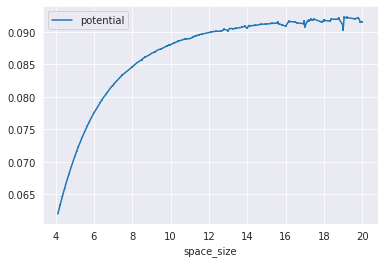

time_size = 16


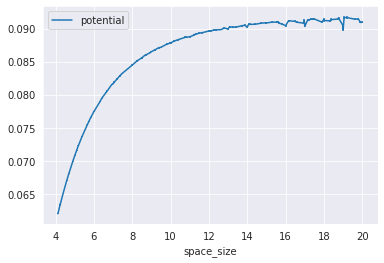

time_size = 17


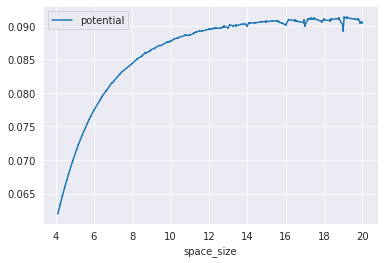

time_size = 18


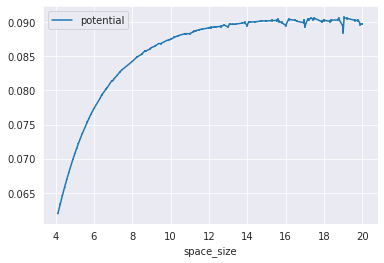

time_size = 19


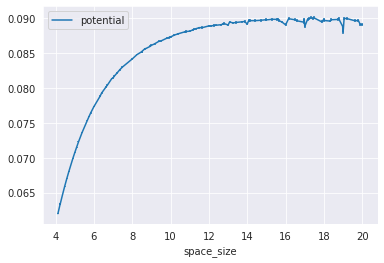

Empty DataFrame
Columns: []
Index: []

In [14]:
df_data_40_5_monopoless = pd.read_csv(f"../result/potential/monopoless/qc2dstag/32^4/HYP6_APE/potential_mu=0.00.csv", index_col=None)
df_data_40_5_monopoless.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


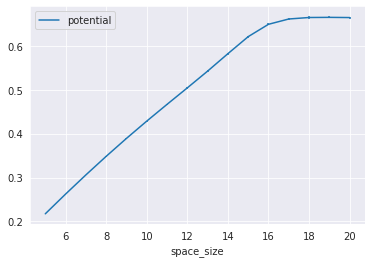

time_size = 5


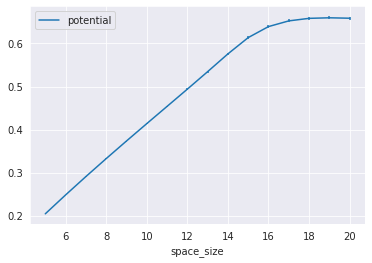

time_size = 6


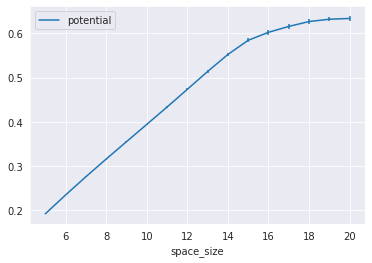

time_size = 7


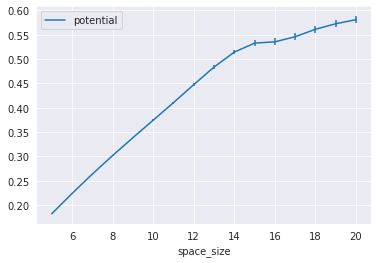

time_size = 8


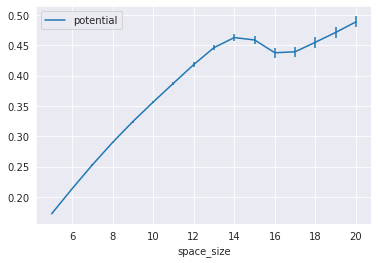

time_size = 9


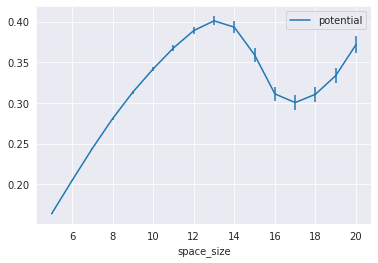

time_size = 10


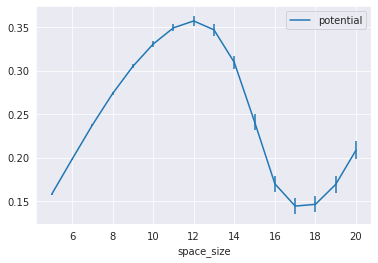

time_size = 11


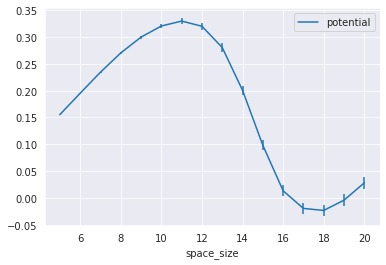

time_size = 12


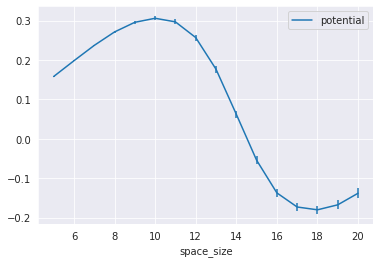

time_size = 13


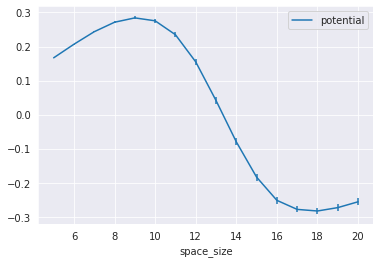

time_size = 14


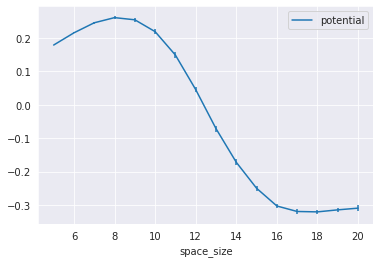

time_size = 15


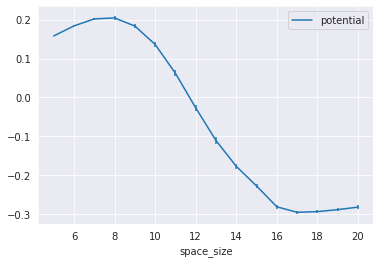

time_size = 16


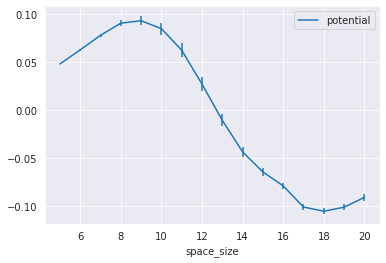

time_size = 17


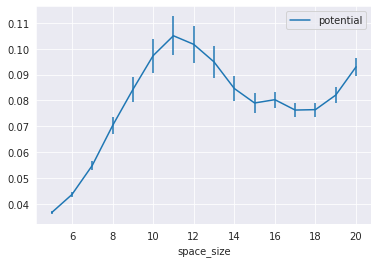

time_size = 18


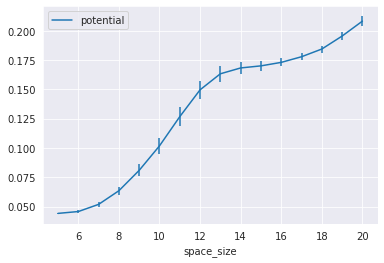

time_size = 19


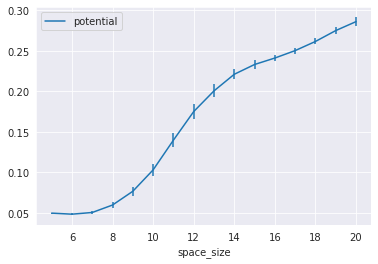

Empty DataFrame
Columns: []
Index: []

In [4]:
df_data_40_5_monopoless = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None)
df_data_40_5_monopoless.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


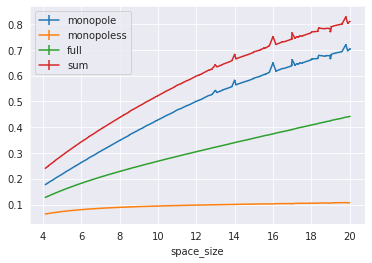

time_size = 5


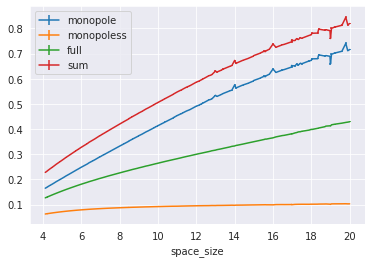

time_size = 6


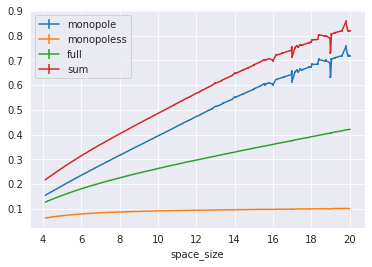

time_size = 7


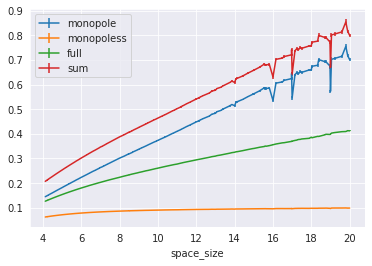

time_size = 8


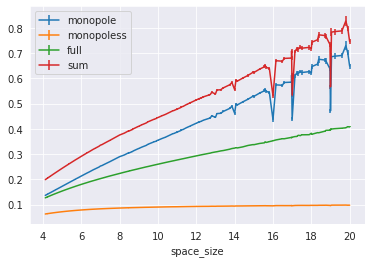

time_size = 9


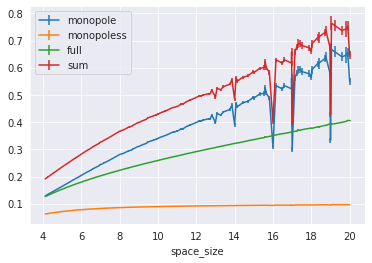

time_size = 10


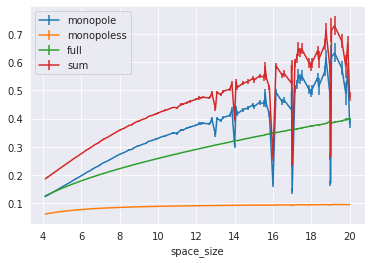

time_size = 11


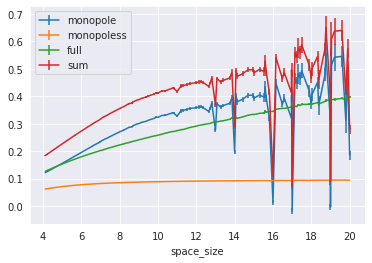

time_size = 12


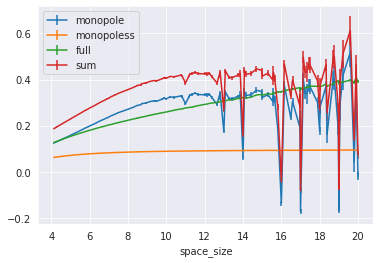

time_size = 13


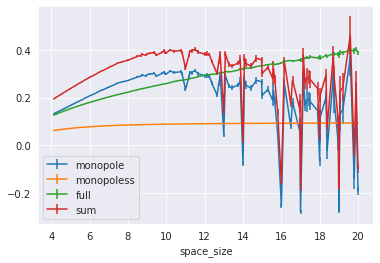

time_size = 14


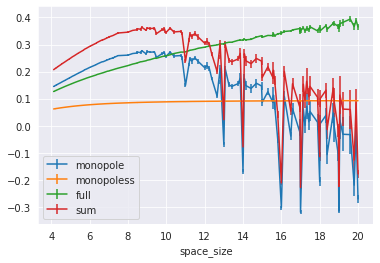

time_size = 15


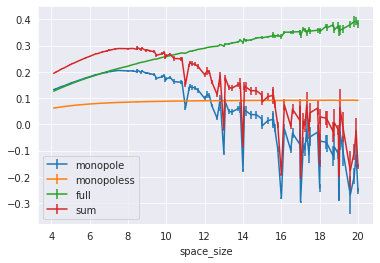

time_size = 16


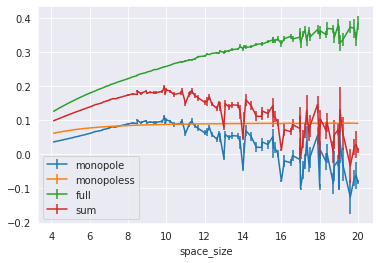

time_size = 17


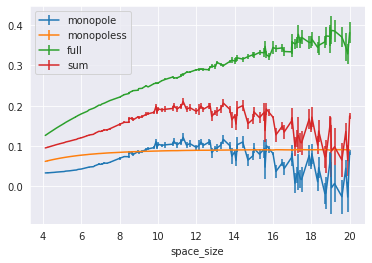

time_size = 18


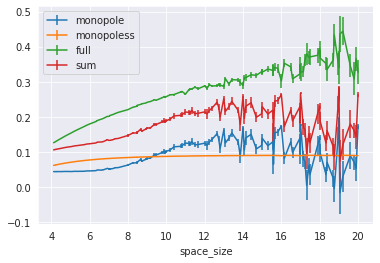

time_size = 19


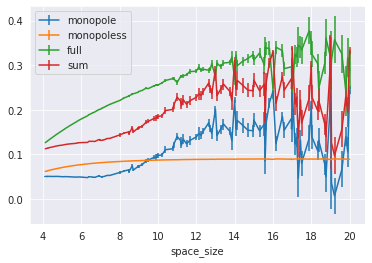

Empty DataFrame
Columns: []
Index: []

In [4]:
data = []
data.append(pd.read_csv(f"../result/potential/qc2dstag/32^4/HYP6_APE/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "full"
data.append(pd.read_csv(f"../result/potential/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "monopole"
data.append(pd.read_csv(f"../result/potential/monopoless/qc2dstag/32^4/HYP6_APE/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "monopoless"
data.append(pd.read_csv(f"../result/potential/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "sum"

data[3][['potential', 'err']] = data[3][['potential', 'err']] + data[2][['potential', 'err']]

df = pd.concat(data)

# is_integer = []
# for i in df['space_size']:
#     is_integer.append(i.is_integer())
# df = df[is_integer]

df.groupby(['time_size']).apply(plot_potential_df_space_several)

time_size = 4


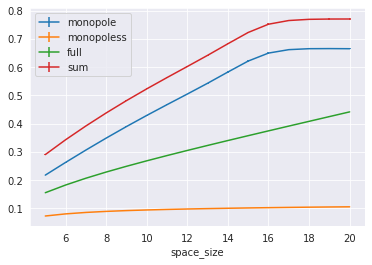

time_size = 5


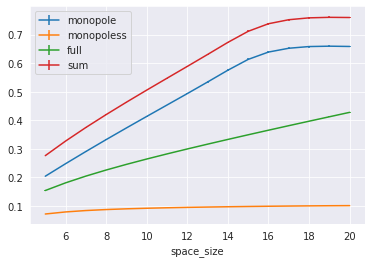

time_size = 6


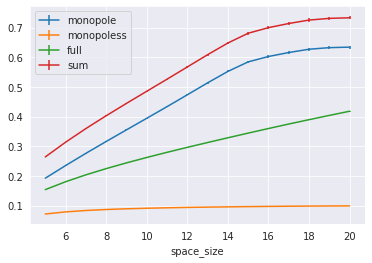

time_size = 7


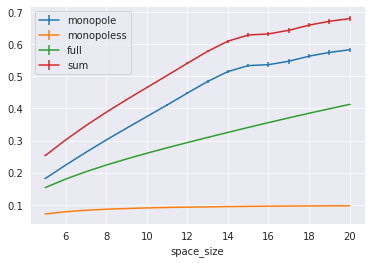

time_size = 8


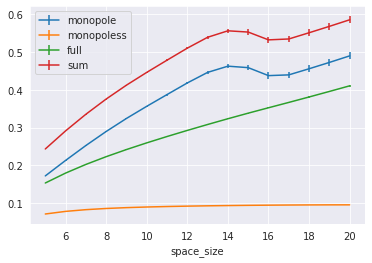

time_size = 9


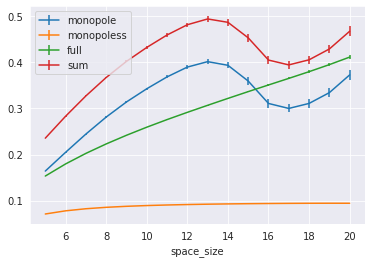

time_size = 10


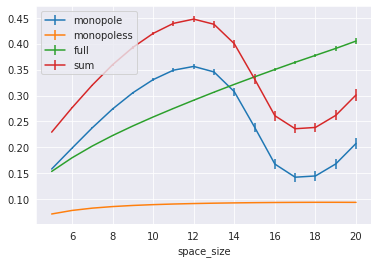

time_size = 11


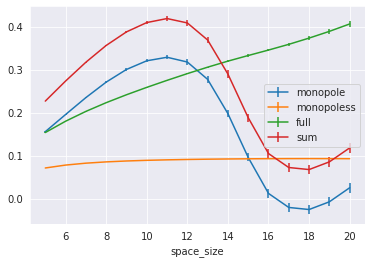

time_size = 12


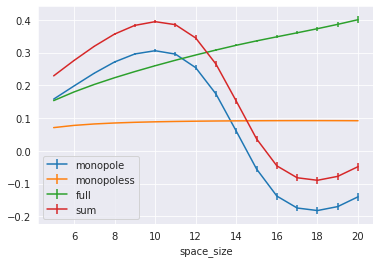

time_size = 13


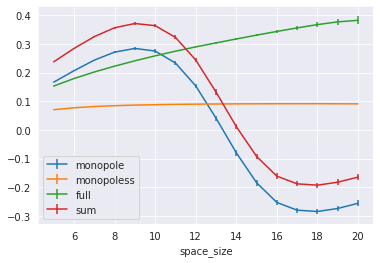

time_size = 14


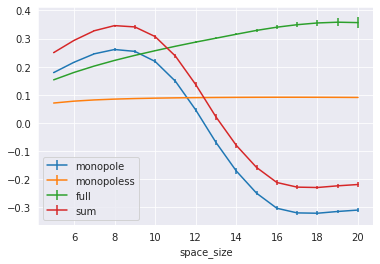

time_size = 15


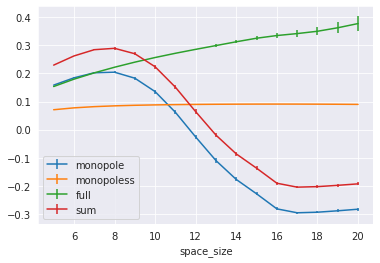

time_size = 16


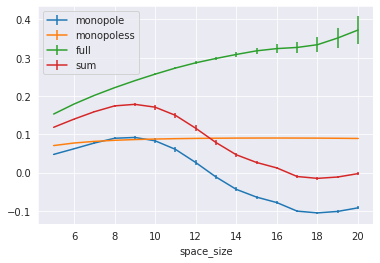

time_size = 17


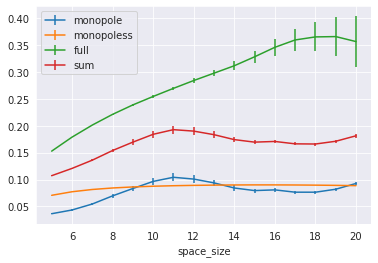

time_size = 18


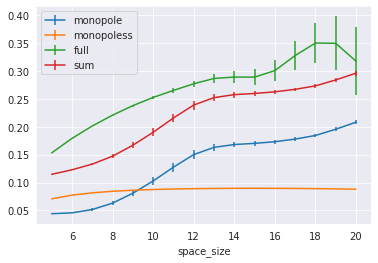

time_size = 19


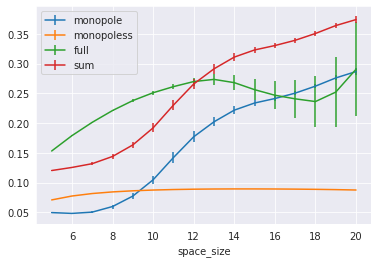

Empty DataFrame
Columns: []
Index: []

In [5]:
data = []
data.append(pd.read_csv(f"../result/potential/on-axis/qc2dstag/32^4/HYP6_APE/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "full"
data.append(pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "monopole"
data.append(pd.read_csv(f"../result/potential/on-axis/monopoless/qc2dstag/32^4/HYP6_APE/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "monopoless"
data.append(pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/32^4/unsmeared/potential_mu=0.00.csv", index_col=None))
data[-1]["type"] = "sum"

data[3][['potential', 'err']] = data[3][['potential', 'err']] + data[2][['potential', 'err']]

df = pd.concat(data)

# is_integer = []
# for i in df['space_size']:
#     is_integer.append(i.is_integer())
# df = df[is_integer]

df.groupby(['time_size']).apply(plot_potential_df_space_several)

time_size = 4


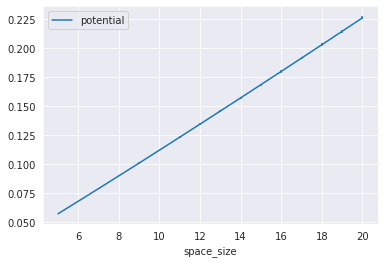

time_size = 5


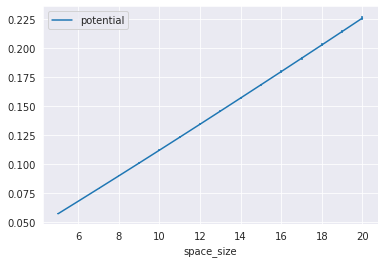

time_size = 6


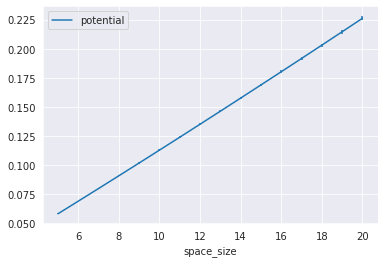

time_size = 7


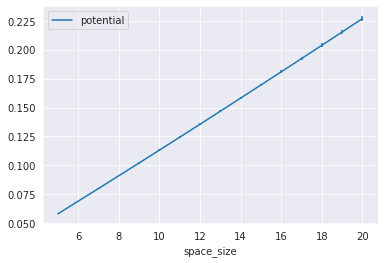

time_size = 8


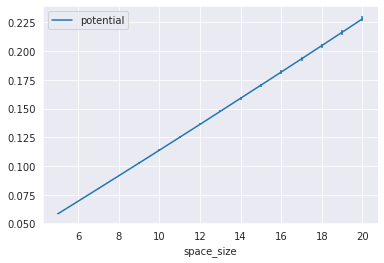

time_size = 9


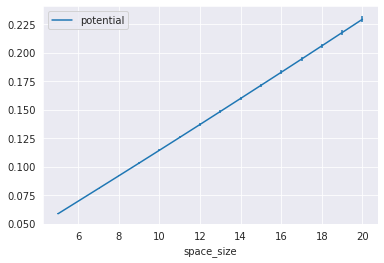

time_size = 10


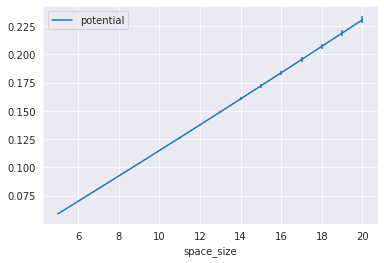

time_size = 11


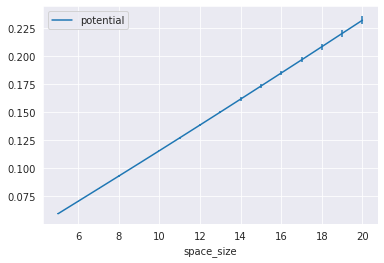

time_size = 12


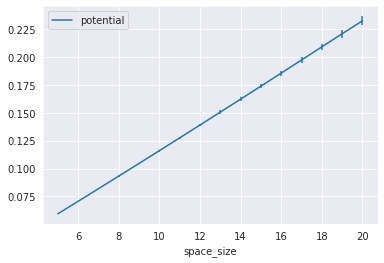

time_size = 13


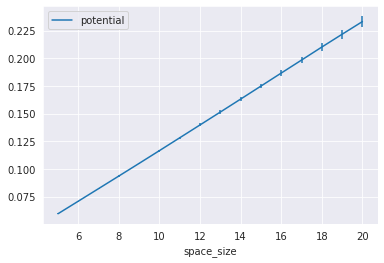

time_size = 14


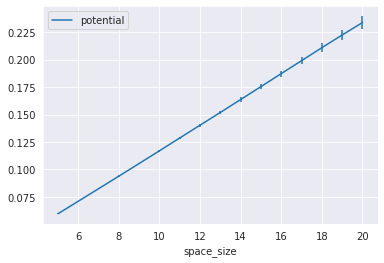

time_size = 15


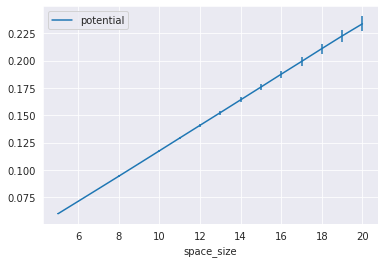

time_size = 16


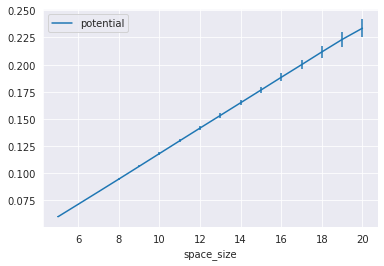

time_size = 17


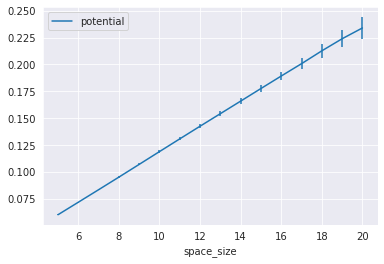

time_size = 18


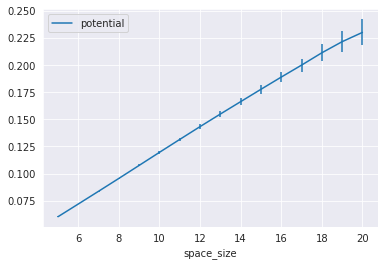

time_size = 19


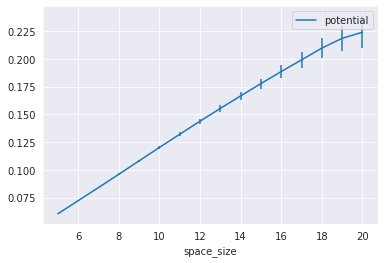

Empty DataFrame
Columns: []
Index: []

In [107]:
df_data = pd.read_csv(f"../result/potential/on-axis/monopole/su2_dynam/32^4/unsmeared/potential_mu=0.00.csv", index_col=None)
df_data.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


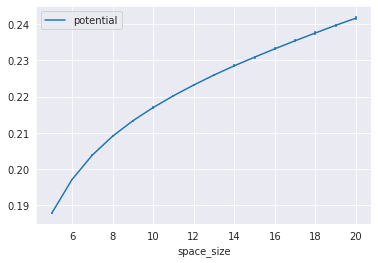

time_size = 5


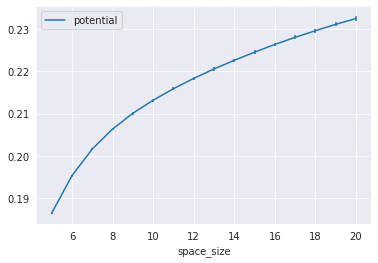

time_size = 6


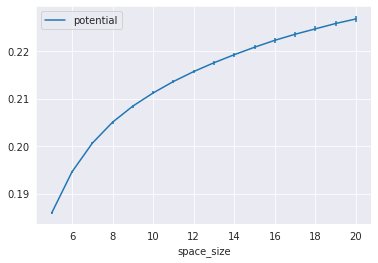

time_size = 7


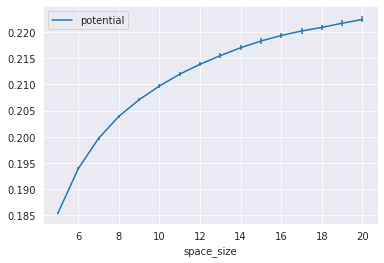

time_size = 8


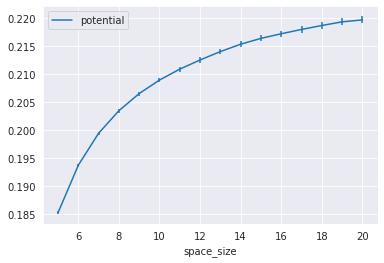

time_size = 9


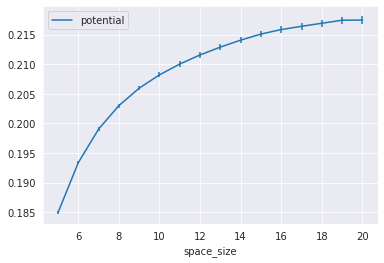

time_size = 10


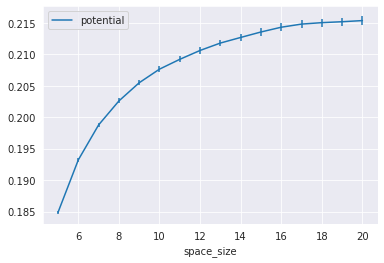

time_size = 11


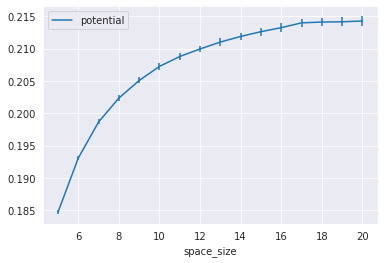

time_size = 12


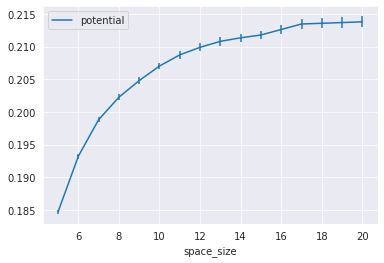

time_size = 13


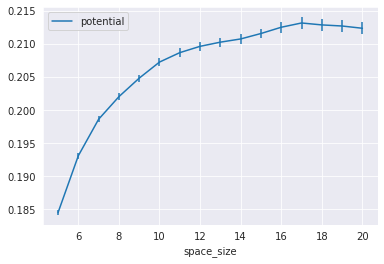

time_size = 14


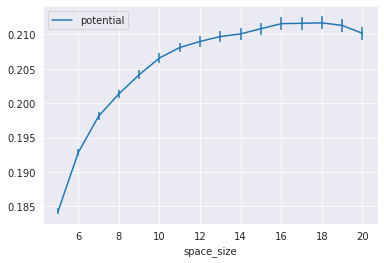

time_size = 15


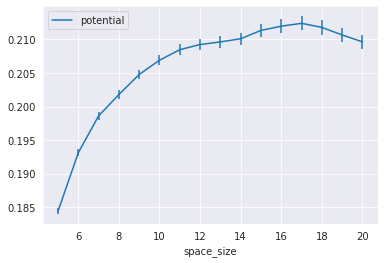

time_size = 16


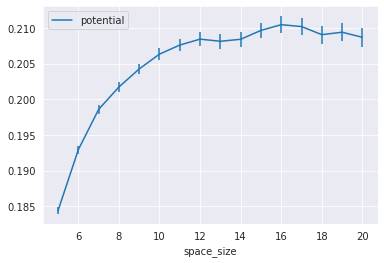

time_size = 17


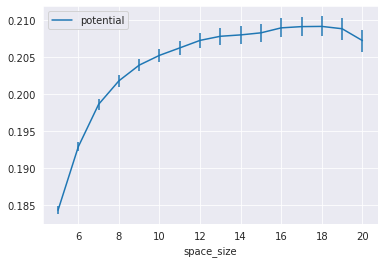

time_size = 18


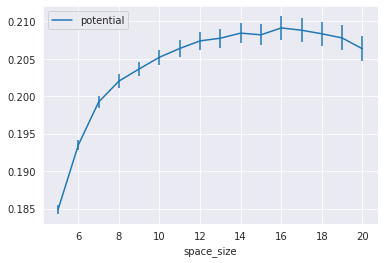

time_size = 19


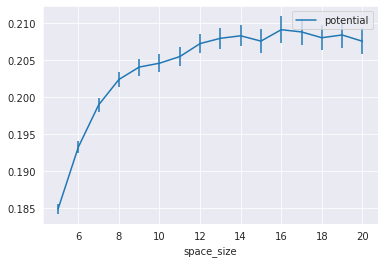

Empty DataFrame
Columns: []
Index: []

In [106]:
df_data = pd.read_csv(f"../result/potential/on-axis/monopoless/su2_dynam/32^4/HYP1_APE/potential_mu=0.00.csv", index_col=None)
df_data.groupby(['time_size']).apply(plot_potential_df_space)